Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from utils import extract_time
from utils import random_generator
from utils import MinMaxScaler,StandScaler
from utils import sine_data_generation
from utils import visualization

from modules_and_training import TimeGAN
from modules_and_training import Time_GAN_module


Parameters

In [2]:
#output_size = 20
gamma = 1
no, seq_len, dim = 12800, 300, 5

parameters = dict()
parameters['module'] = 'gru' 
parameters['hidden_dim'] = 40
parameters['num_layers'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128
parameters['epoch'] = 10

Data Generation:
12800 synthetic time univariate timeseries are created, with 24 timesteps each 

In [3]:
def StandScaler(data): # (time_steps, channels)
  trial_n=data.shape[0]
  chn=data.shape[1]
  seq_len=data.shape[2]
  data=np.reshape(data,(trial_n*chn,seq_len))
  scaler = StandardScaler()
  dataa = scaler.fit_transform((data))
  dataa=np.reshape(dataa,(trial_n,chn,seq_len))
  return dataa

In [4]:
data = sine_data_generation(no, seq_len, dim)
data=np.asarray(data)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
#data = MinMaxScaler(data)
data = StandScaler(np.asarray(data))
data = torch.Tensor(data)
data.shape # torch.Size([12800, 300, 5])

torch.Size([12800, 300, 5])

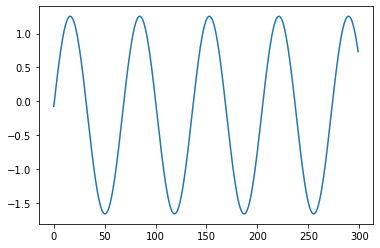

In [7]:
plt.plot(data[1,:,2])

Training and Examination of generating process: for each epoch a single sample is generated from the current state of the generator and visualized alongside with the coressponding loss values

In [8]:
import sys, importlib
importlib.reload(sys.modules['modules_and_training'])
from modules_and_training import Time_GAN_module

Start Embedding Network Training
step: 1/10, e_loss: 3.1450622
step: 2/10, e_loss: 3.1191356
step: 3/10, e_loss: 3.1187313
step: 4/10, e_loss: 3.1184385
step: 5/10, e_loss: 3.118317
step: 6/10, e_loss: 3.1182408
step: 7/10, e_loss: 3.1182573
step: 8/10, e_loss: 3.0865254
step: 9/10, e_loss: 3.0411859
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 1/10, s_loss: 0.050881844
step: 2/10, s_loss: 0.021946138
step: 3/10, s_loss: 0.010670859
step: 4/10, s_loss: 0.0073369574
step: 5/10, s_loss: 0.0057327724
step: 6/10, s_loss: 0.004853125
step: 7/10, s_loss: 0.0042512207
step: 8/10, s_loss: 0.0038067196
step: 9/10, s_loss: 0.0034350946
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10, D_loss: 3.566743, G_loss_U: 0.40077087, G_loss_S: 9.991868e-06, E_loss_t0: 3.1657457


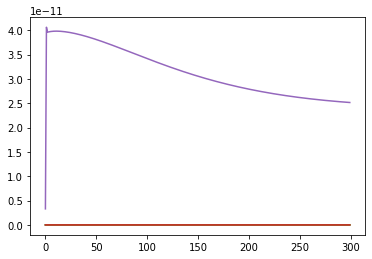

step: 0/10, D_loss: 2.6069245, G_loss_U: 0.7208531, G_loss_S: 0.00029754956, E_loss_t0: 3.1631634


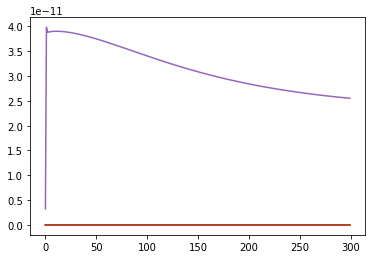

step: 0/10, D_loss: 2.0457869, G_loss_U: 1.044858, G_loss_S: 0.0015571753, E_loss_t0: 3.1655276


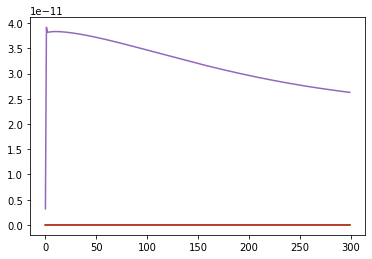

step: 0/10, D_loss: 1.9203926, G_loss_U: 1.2369908, G_loss_S: 0.003357034, E_loss_t0: 3.1543427


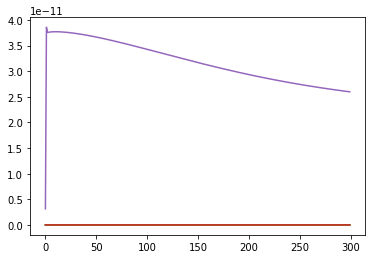

step: 0/10, D_loss: 1.9327395, G_loss_U: 1.2685655, G_loss_S: 0.0042820675, E_loss_t0: 3.1617455


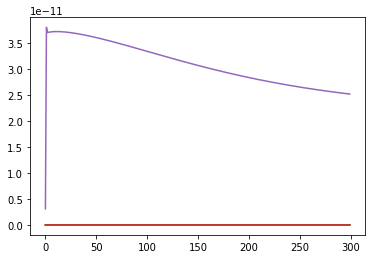

step: 0/10, D_loss: 1.9242277, G_loss_U: 1.1910146, G_loss_S: 0.006159098, E_loss_t0: 3.164197


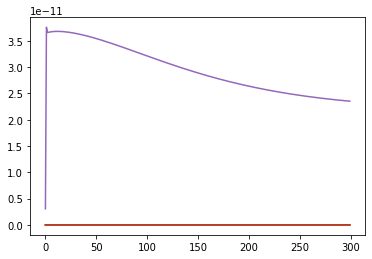

step: 0/10, D_loss: 1.8895075, G_loss_U: 1.0726081, G_loss_S: 0.011201441, E_loss_t0: 3.1625957


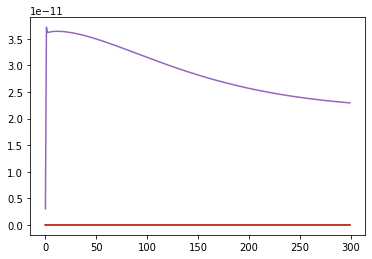

step: 0/10, D_loss: 1.8581587, G_loss_U: 0.9844157, G_loss_S: 0.018618789, E_loss_t0: 3.1446376


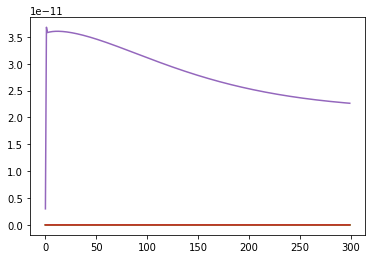

step: 0/10, D_loss: 1.8281451, G_loss_U: 0.96964437, G_loss_S: 0.02712701, E_loss_t0: 3.167563


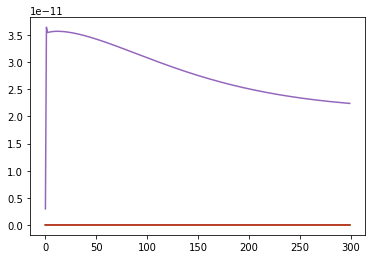

step: 0/10, D_loss: 1.7488252, G_loss_U: 1.0288026, G_loss_S: 0.03550093, E_loss_t0: 3.1575525


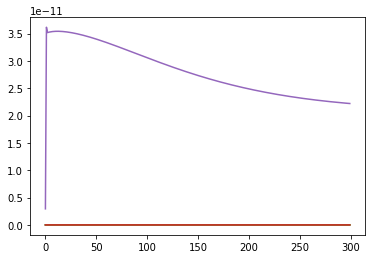

step: 0/10, D_loss: 1.5669675, G_loss_U: 1.1291711, G_loss_S: 0.045862723, E_loss_t0: 3.1672378


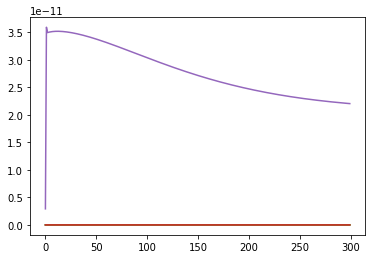

step: 0/10, D_loss: 1.2363877, G_loss_U: 1.3458569, G_loss_S: 0.060829565, E_loss_t0: 3.1685178


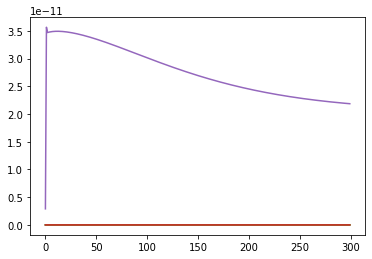

step: 0/10, D_loss: 0.8441953, G_loss_U: 1.8848419, G_loss_S: 0.07822901, E_loss_t0: 3.1663792


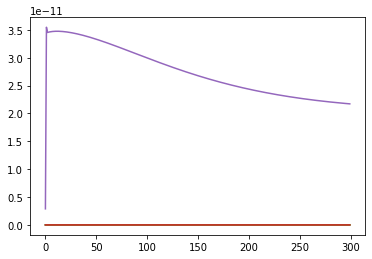

step: 0/10, D_loss: 0.5333215, G_loss_U: 2.3482752, G_loss_S: 0.09287554, E_loss_t0: 3.165123


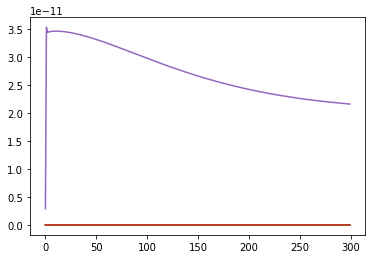

step: 0/10, D_loss: 0.3623612, G_loss_U: 2.697687, G_loss_S: 0.10184538, E_loss_t0: 3.1705375


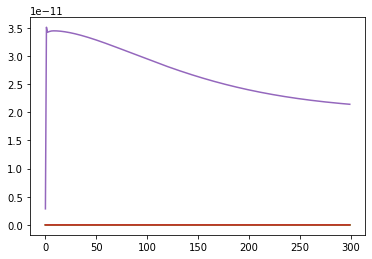

step: 0/10, D_loss: 0.26180586, G_loss_U: 2.9946318, G_loss_S: 0.106051266, E_loss_t0: 3.1647005


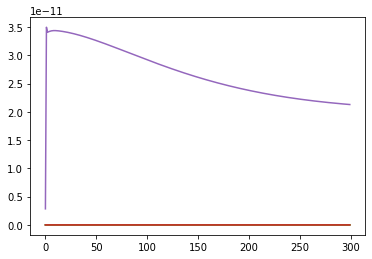

step: 0/10, D_loss: 0.19468608, G_loss_U: 3.2655265, G_loss_S: 0.10684625, E_loss_t0: 3.1542616


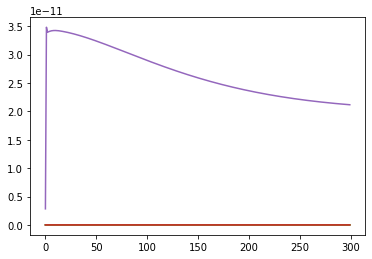

step: 0/10, D_loss: 0.14712916, G_loss_U: 3.2654595, G_loss_S: 0.10555811, E_loss_t0: 3.1606023


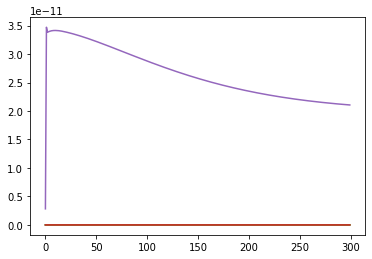

step: 0/10, D_loss: 0.1468077, G_loss_U: 3.2654057, G_loss_S: 0.102708, E_loss_t0: 3.166354


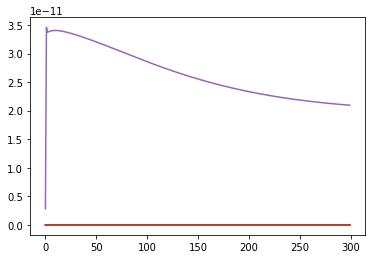

step: 0/10, D_loss: 0.1467838, G_loss_U: 3.2653613, G_loss_S: 0.09865087, E_loss_t0: 3.1497002


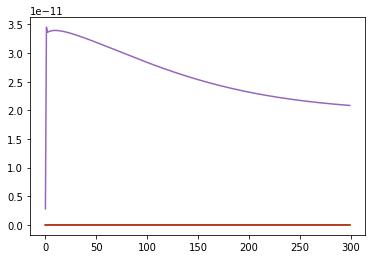

step: 0/10, D_loss: 0.14700279, G_loss_U: 3.2653253, G_loss_S: 0.094104685, E_loss_t0: 3.16965


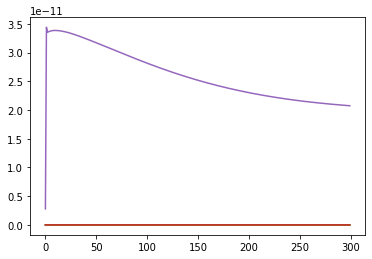

step: 0/10, D_loss: 0.14742103, G_loss_U: 3.2652948, G_loss_S: 0.09060611, E_loss_t0: 3.1522558


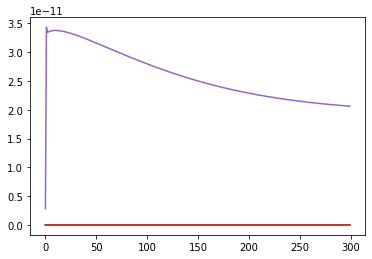

step: 0/10, D_loss: 0.14790589, G_loss_U: 3.265269, G_loss_S: 0.0887273, E_loss_t0: 3.1636188


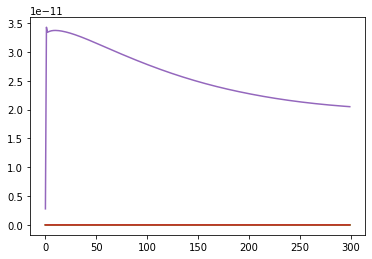

step: 0/10, D_loss: 0.14842726, G_loss_U: 3.2652476, G_loss_S: 0.087104514, E_loss_t0: 3.1753726


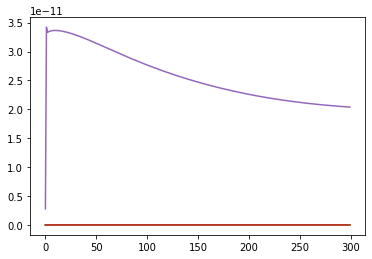

step: 0/10, D_loss: 0.14897187, G_loss_U: 3.2652287, G_loss_S: 0.08491121, E_loss_t0: 3.1553993


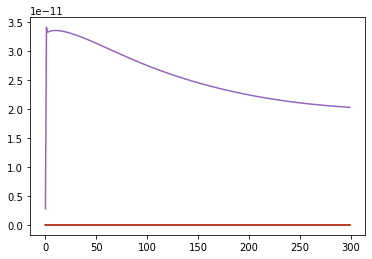

step: 0/10, D_loss: 0.1495523, G_loss_U: 3.2652125, G_loss_S: 0.08211577, E_loss_t0: 3.1595006


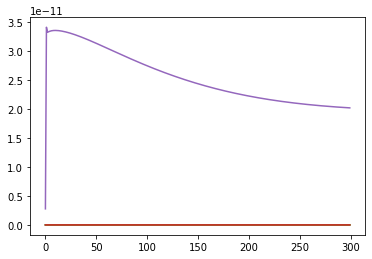

step: 0/10, D_loss: 0.15019026, G_loss_U: 3.519869, G_loss_S: 0.07891416, E_loss_t0: 3.16437


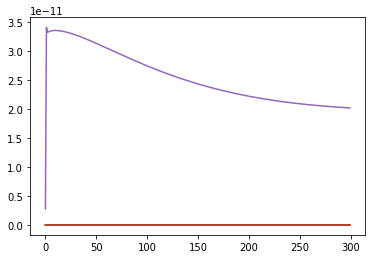

step: 0/10, D_loss: 0.11503489, G_loss_U: 3.5198617, G_loss_S: 0.07533564, E_loss_t0: 3.175605


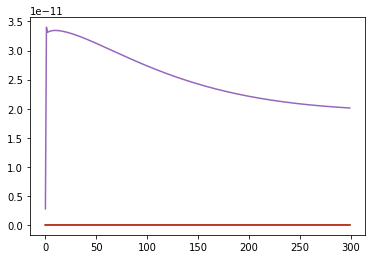

step: 0/10, D_loss: 0.1155204, G_loss_U: 3.5198553, G_loss_S: 0.071573816, E_loss_t0: 3.1636362


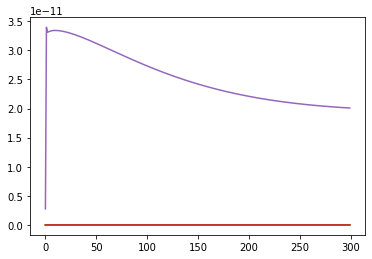

step: 0/10, D_loss: 0.1162581, G_loss_U: 3.5198503, G_loss_S: 0.06750342, E_loss_t0: 3.1591566


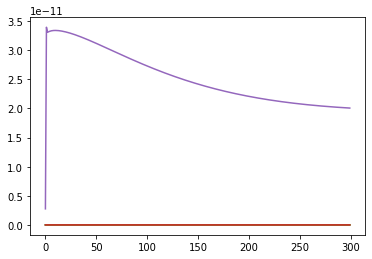

step: 0/10, D_loss: 0.1174544, G_loss_U: 3.5198455, G_loss_S: 0.06355639, E_loss_t0: 3.1598585


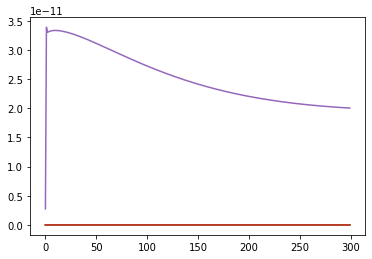

step: 0/10, D_loss: 0.1194508, G_loss_U: 3.5198414, G_loss_S: 0.060394894, E_loss_t0: 3.1675806


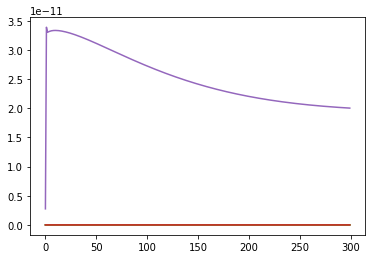

step: 0/10, D_loss: 0.12290979, G_loss_U: 3.5198374, G_loss_S: 0.058361474, E_loss_t0: 3.163541


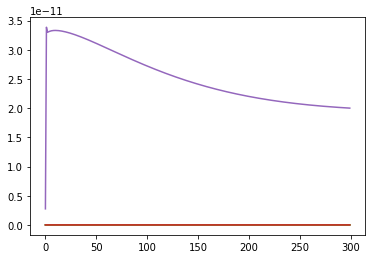

step: 0/10, D_loss: 0.12936391, G_loss_U: 3.519834, G_loss_S: 0.05691861, E_loss_t0: 3.1583128


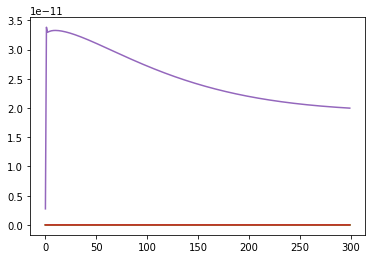

step: 0/10, D_loss: 0.14387393, G_loss_U: 3.5198307, G_loss_S: 0.055484213, E_loss_t0: 3.16633


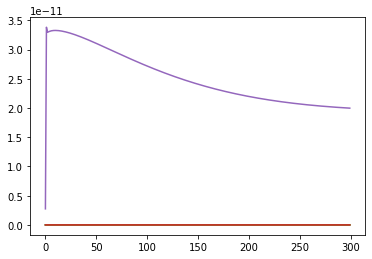

step: 0/10, D_loss: 0.20069748, G_loss_U: 3.7541473, G_loss_S: 0.05354839, E_loss_t0: 3.1676502


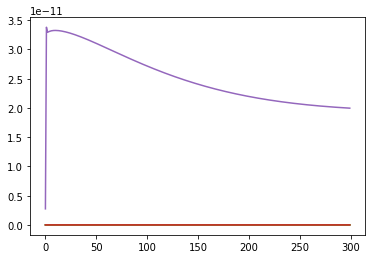

step: 0/10, D_loss: 0.08831178, G_loss_U: 3.7541423, G_loss_S: 0.058308013, E_loss_t0: 3.168515


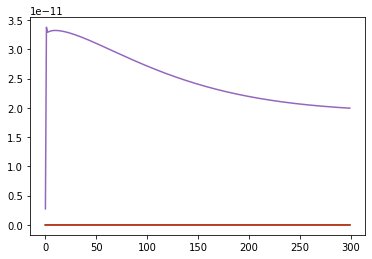

step: 0/10, D_loss: 0.08716875, G_loss_U: 3.7541375, G_loss_S: 0.066992044, E_loss_t0: 3.1640627


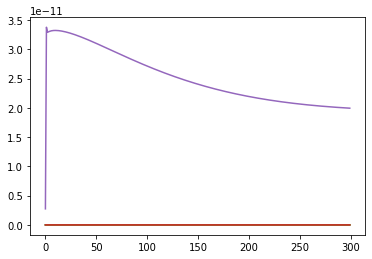

step: 0/10, D_loss: 0.08658632, G_loss_U: 3.7541335, G_loss_S: 0.07699503, E_loss_t0: 3.1495998


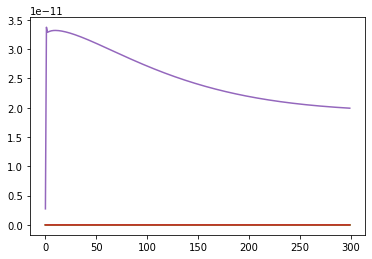

step: 0/10, D_loss: 0.086245164, G_loss_U: 3.7541285, G_loss_S: 0.08651798, E_loss_t0: 3.168941


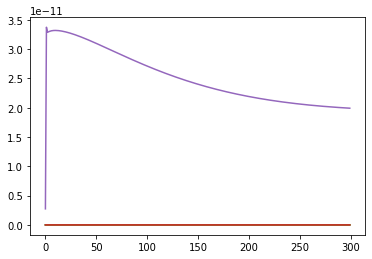

step: 0/10, D_loss: 0.086032085, G_loss_U: 3.7541237, G_loss_S: 0.094575964, E_loss_t0: 3.1510155


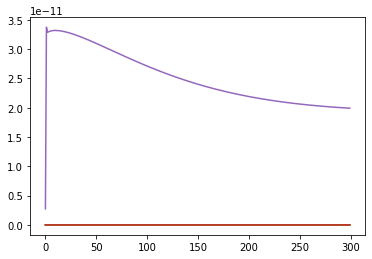

step: 0/10, D_loss: 0.085896835, G_loss_U: 3.7541187, G_loss_S: 0.0999459, E_loss_t0: 3.1618748


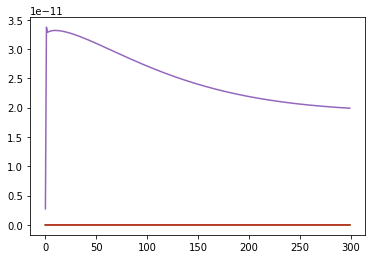

step: 0/10, D_loss: 0.08581117, G_loss_U: 3.754114, G_loss_S: 0.10385576, E_loss_t0: 3.1604114


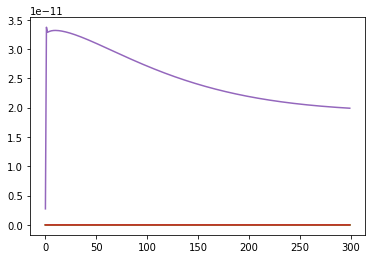

step: 0/10, D_loss: 0.08575445, G_loss_U: 3.754109, G_loss_S: 0.10671143, E_loss_t0: 3.157476


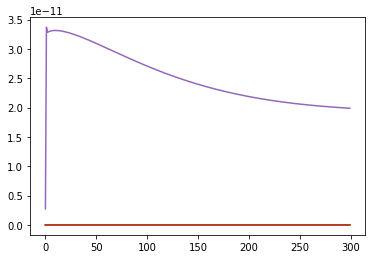

step: 0/10, D_loss: 0.08572021, G_loss_U: 3.7541049, G_loss_S: 0.107611425, E_loss_t0: 3.1678355


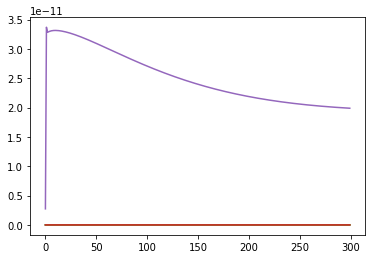

step: 0/10, D_loss: 0.08570795, G_loss_U: 3.7541, G_loss_S: 0.10633873, E_loss_t0: 3.1589396


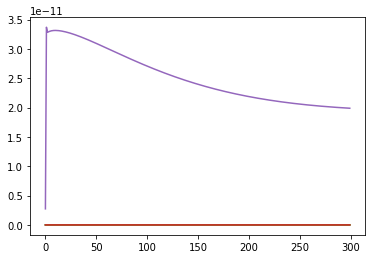

step: 0/10, D_loss: 0.08571273, G_loss_U: 3.7540944, G_loss_S: 0.1034959, E_loss_t0: 3.1590393


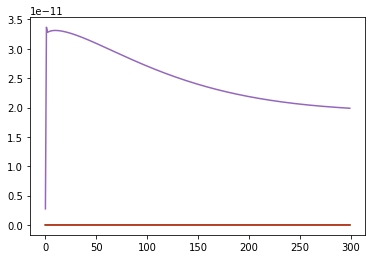

step: 0/10, D_loss: 0.08572563, G_loss_U: 3.7540894, G_loss_S: 0.10043435, E_loss_t0: 3.1614366


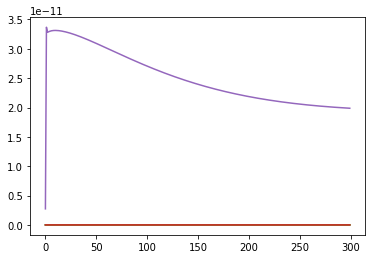

step: 0/10, D_loss: 0.08574735, G_loss_U: 3.7540846, G_loss_S: 0.09725972, E_loss_t0: 3.1735537


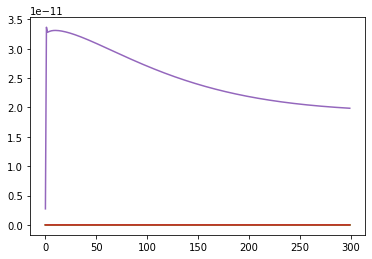

step: 0/10, D_loss: 0.085778326, G_loss_U: 3.7540789, G_loss_S: 0.09371113, E_loss_t0: 3.1487877


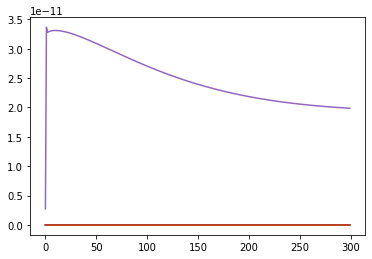

step: 0/10, D_loss: 0.08582134, G_loss_U: 3.754074, G_loss_S: 0.08953373, E_loss_t0: 3.1696067


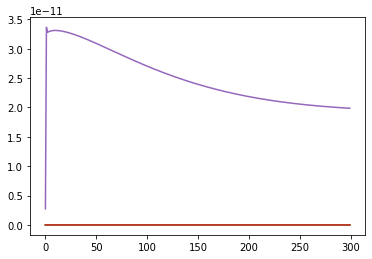

step: 0/10, D_loss: 0.085880905, G_loss_U: 3.7540684, G_loss_S: 0.08477187, E_loss_t0: 3.1672974


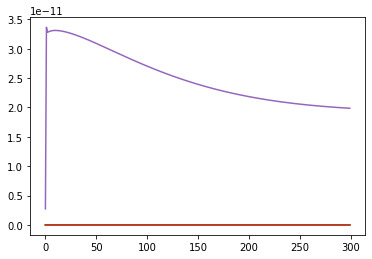

step: 0/10, D_loss: 0.08595833, G_loss_U: 3.7540627, G_loss_S: 0.080086835, E_loss_t0: 3.1558588


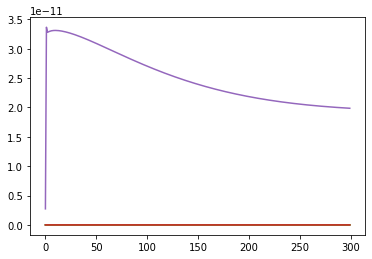

step: 0/10, D_loss: 0.086048044, G_loss_U: 3.754057, G_loss_S: 0.07617456, E_loss_t0: 3.1614177


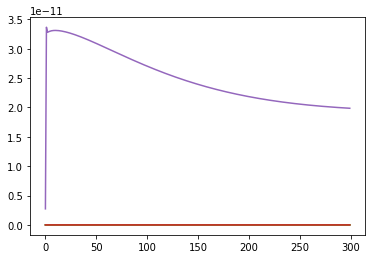

step: 0/10, D_loss: 0.08615198, G_loss_U: 3.7540505, G_loss_S: 0.07268142, E_loss_t0: 3.1676369


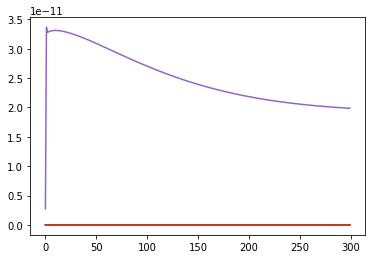

step: 0/10, D_loss: 0.08627029, G_loss_U: 3.7540448, G_loss_S: 0.06933553, E_loss_t0: 3.160896


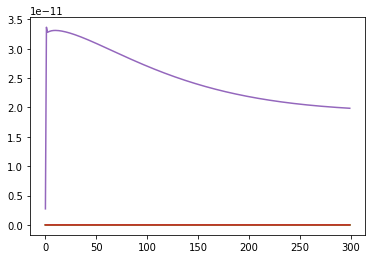

step: 0/10, D_loss: 0.08641091, G_loss_U: 3.754038, G_loss_S: 0.06589405, E_loss_t0: 3.1634982


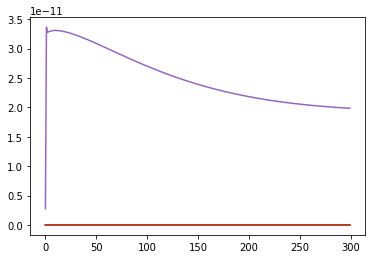

step: 0/10, D_loss: 0.086580314, G_loss_U: 3.7540317, G_loss_S: 0.0619943, E_loss_t0: 3.1587052


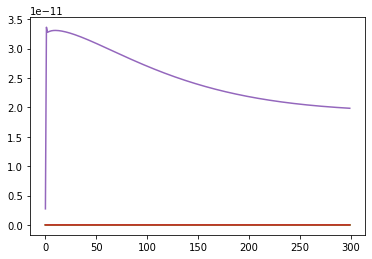

step: 0/10, D_loss: 0.08682914, G_loss_U: 3.7540252, G_loss_S: 0.05645064, E_loss_t0: 3.1598926


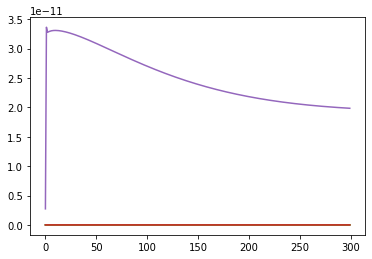

step: 0/10, D_loss: 0.08720491, G_loss_U: 3.7540185, G_loss_S: 0.051578723, E_loss_t0: 3.163651


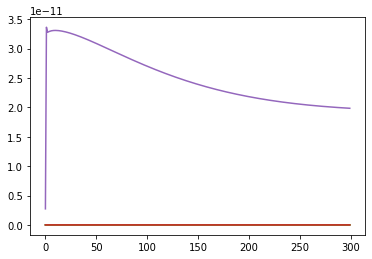

step: 0/10, D_loss: 0.087653115, G_loss_U: 3.7540114, G_loss_S: 0.047642734, E_loss_t0: 3.1717136


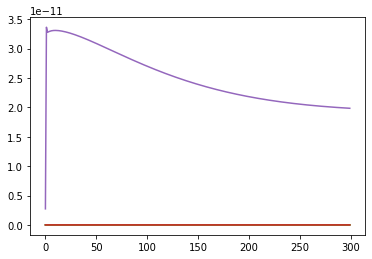

step: 0/10, D_loss: 0.08828925, G_loss_U: 3.7540047, G_loss_S: 0.043246593, E_loss_t0: 3.1601322


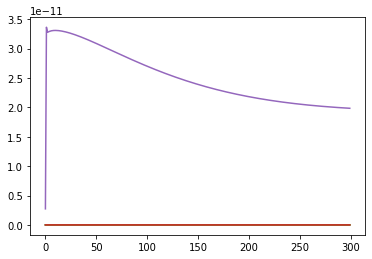

step: 0/10, D_loss: 0.08932996, G_loss_U: 3.7539976, G_loss_S: 0.03854827, E_loss_t0: 3.1749582


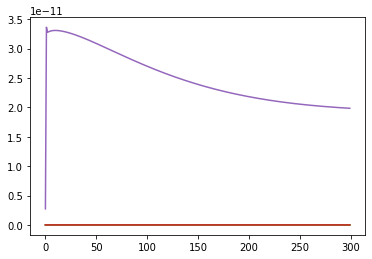

step: 0/10, D_loss: 0.09151783, G_loss_U: 3.7539902, G_loss_S: 0.034551796, E_loss_t0: 3.1615562


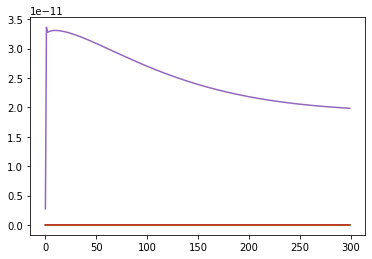

step: 0/10, D_loss: 0.100296356, G_loss_U: 3.7539828, G_loss_S: 0.031603325, E_loss_t0: 3.1727412


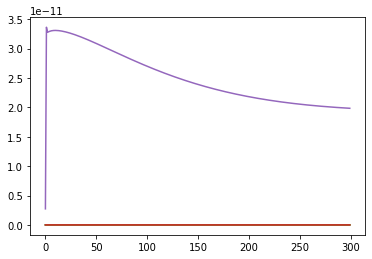

step: 0/10, D_loss: 3.2579367, G_loss_U: 3.643502, G_loss_S: 0.029375557, E_loss_t0: 3.1624022


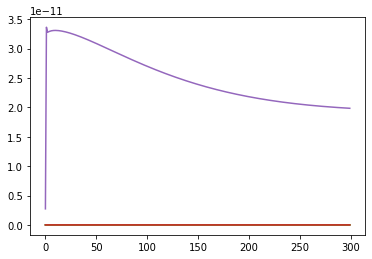

step: 0/10, D_loss: 0.08568171, G_loss_U: 3.6421974, G_loss_S: 0.037456576, E_loss_t0: 3.1604528


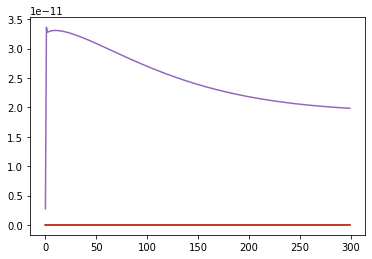

step: 0/10, D_loss: 0.085252725, G_loss_U: 3.6403599, G_loss_S: 0.053141676, E_loss_t0: 3.1649253


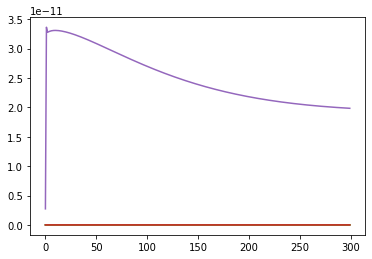

step: 0/10, D_loss: 0.085090324, G_loss_U: 3.638314, G_loss_S: 0.07109892, E_loss_t0: 3.1544533


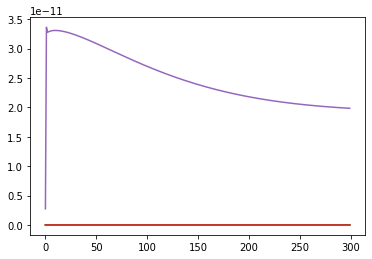

step: 0/10, D_loss: 0.08502935, G_loss_U: 3.6362753, G_loss_S: 0.08815491, E_loss_t0: 3.1590517


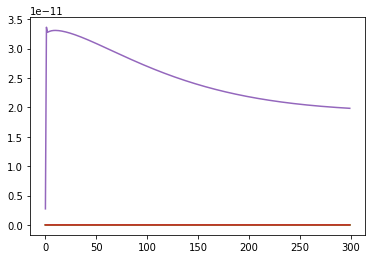

step: 0/10, D_loss: 0.08501521, G_loss_U: 3.6342685, G_loss_S: 0.10293019, E_loss_t0: 3.1703198


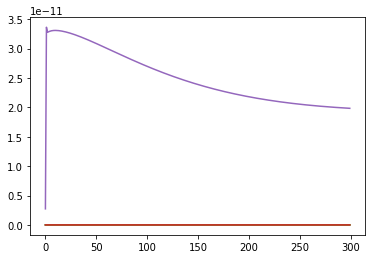

step: 0/10, D_loss: 0.08503017, G_loss_U: 3.6321192, G_loss_S: 0.115225494, E_loss_t0: 3.163489


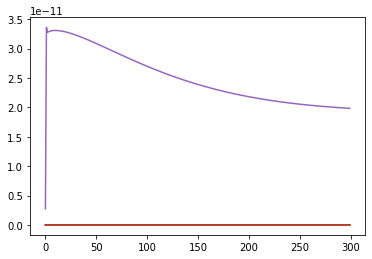

step: 0/10, D_loss: 0.08507264, G_loss_U: 3.6295152, G_loss_S: 0.12531772, E_loss_t0: 3.152192


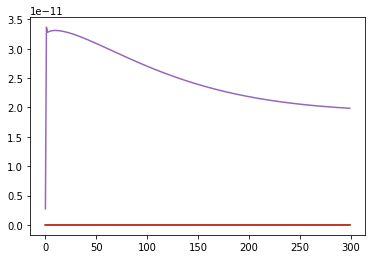

step: 0/10, D_loss: 0.085148305, G_loss_U: 3.6260605, G_loss_S: 0.13301447, E_loss_t0: 3.1628323


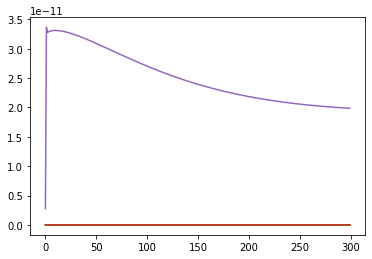

step: 0/10, D_loss: 0.08526466, G_loss_U: 3.6213672, G_loss_S: 0.13899581, E_loss_t0: 3.170019


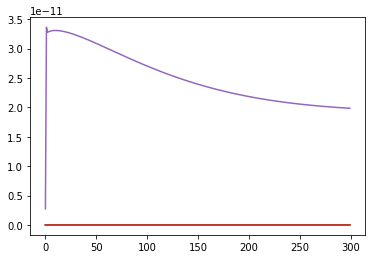

step: 0/10, D_loss: 0.08542703, G_loss_U: 3.6152093, G_loss_S: 0.14354508, E_loss_t0: 3.1528616


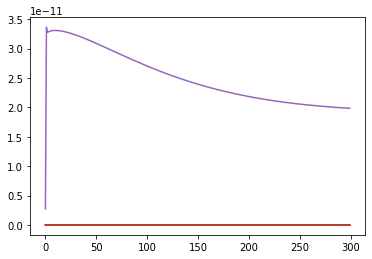

step: 0/10, D_loss: 0.085632406, G_loss_U: 3.6076653, G_loss_S: 0.14684275, E_loss_t0: 3.1607893


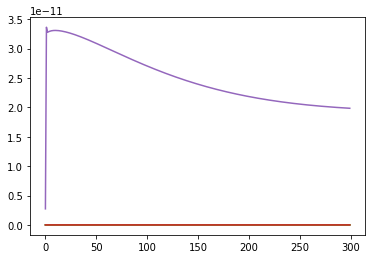

step: 0/10, D_loss: 0.085865535, G_loss_U: 3.5992684, G_loss_S: 0.14939158, E_loss_t0: 3.1564639


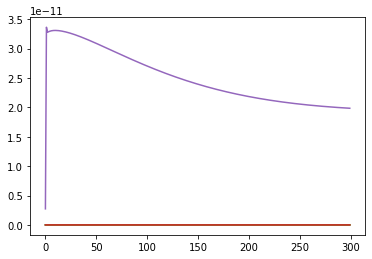

step: 0/10, D_loss: 0.08610122, G_loss_U: 3.5909371, G_loss_S: 0.15130803, E_loss_t0: 3.162192


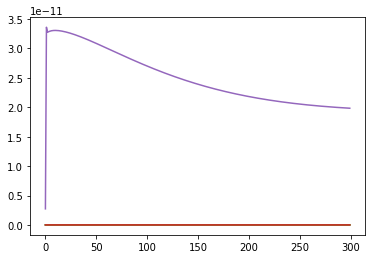

step: 0/10, D_loss: 0.086316764, G_loss_U: 3.5834222, G_loss_S: 0.15218173, E_loss_t0: 3.1549528


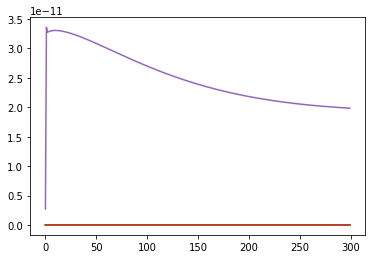

step: 0/10, D_loss: 0.08650459, G_loss_U: 3.5769541, G_loss_S: 0.15317738, E_loss_t0: 3.174894


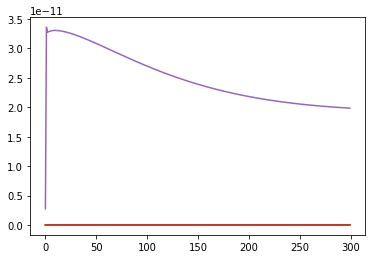

step: 0/10, D_loss: 0.08666486, G_loss_U: 3.5715084, G_loss_S: 0.15349828, E_loss_t0: 3.1642888


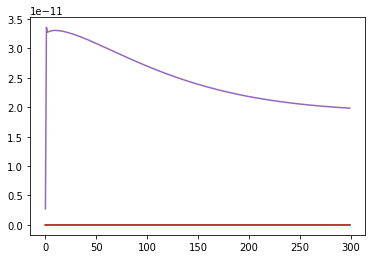

step: 0/10, D_loss: 0.08679452, G_loss_U: 3.5671737, G_loss_S: 0.15340036, E_loss_t0: 3.1553693


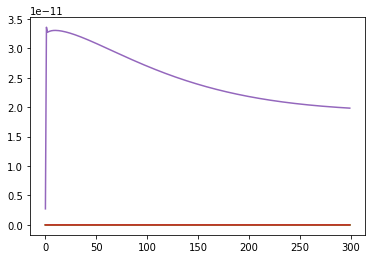

step: 0/10, D_loss: 0.0868907, G_loss_U: 3.5640008, G_loss_S: 0.15278369, E_loss_t0: 3.1547654


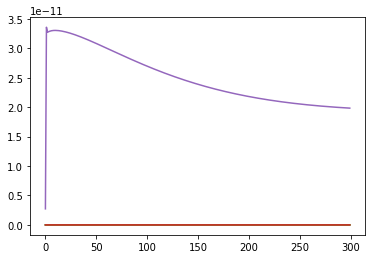

step: 0/10, D_loss: 0.08696307, G_loss_U: 3.5616512, G_loss_S: 0.15217642, E_loss_t0: 3.1600828


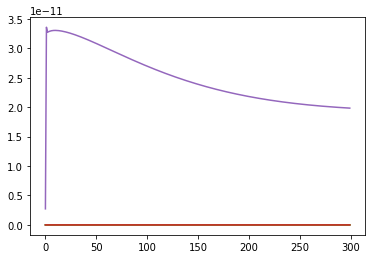

step: 0/10, D_loss: 0.08703174, G_loss_U: 3.559458, G_loss_S: 0.15122247, E_loss_t0: 3.1712232


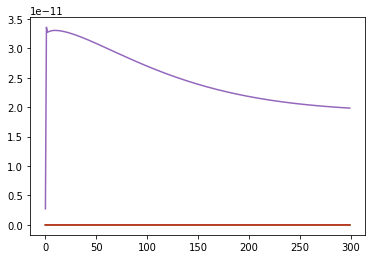

step: 0/10, D_loss: 0.0871221, G_loss_U: 3.5565886, G_loss_S: 0.15006748, E_loss_t0: 3.155698


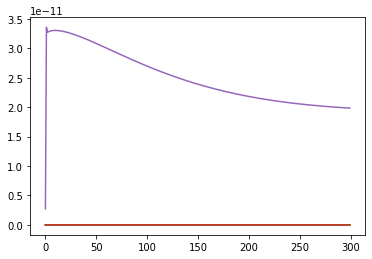

step: 0/10, D_loss: 0.087265536, G_loss_U: 3.5520532, G_loss_S: 0.14866817, E_loss_t0: 3.1635027


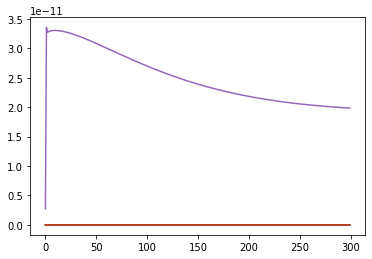

step: 0/10, D_loss: 0.08749456, G_loss_U: 3.544839, G_loss_S: 0.14701577, E_loss_t0: 3.1506956


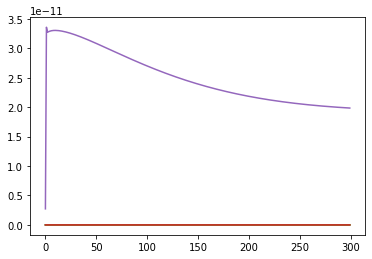

step: 0/10, D_loss: 0.08783072, G_loss_U: 3.5343523, G_loss_S: 0.1448997, E_loss_t0: 3.1702156


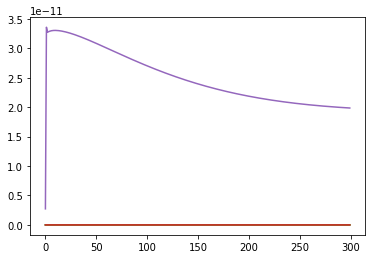

step: 0/10, D_loss: 0.08826396, G_loss_U: 3.5210946, G_loss_S: 0.14285558, E_loss_t0: 3.1607835


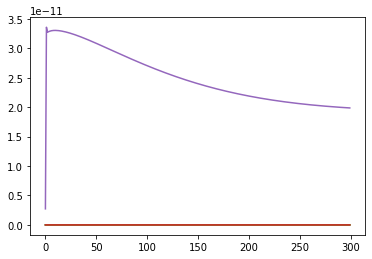

step: 0/10, D_loss: 0.08873813, G_loss_U: 3.5069354, G_loss_S: 0.14037806, E_loss_t0: 3.157148


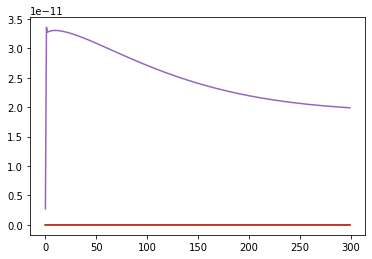

step: 0/10, D_loss: 0.0891837, G_loss_U: 3.4941041, G_loss_S: 0.13772525, E_loss_t0: 3.1669421


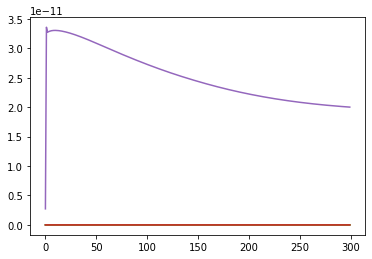

step: 0/10, D_loss: 0.0895705, G_loss_U: 3.4834661, G_loss_S: 0.13431367, E_loss_t0: 3.167863


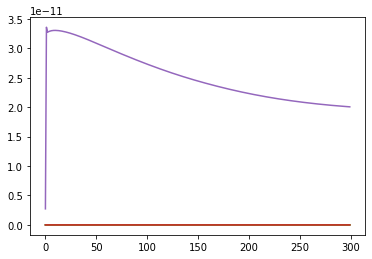

step: 0/10, D_loss: 0.09272638, G_loss_U: 3.4743385, G_loss_S: 0.13033113, E_loss_t0: 3.154696


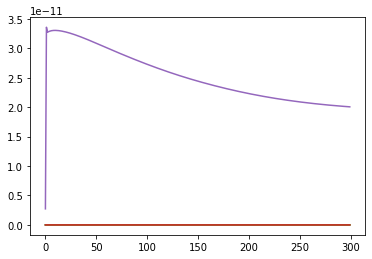

step: 0/10, D_loss: 0.10309109, G_loss_U: 3.466088, G_loss_S: 0.12639517, E_loss_t0: 3.1646945


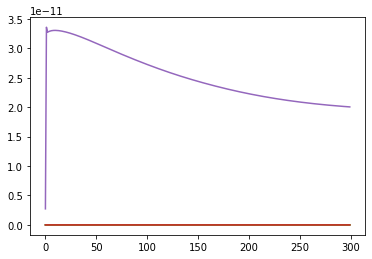

step: 0/10, D_loss: 0.12567513, G_loss_U: 3.458974, G_loss_S: 0.122650295, E_loss_t0: 3.162837


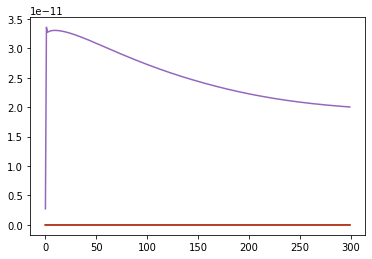

step: 0/10, D_loss: 0.18607947, G_loss_U: 0.06932227, G_loss_S: 0.11889991, E_loss_t0: 3.1668088


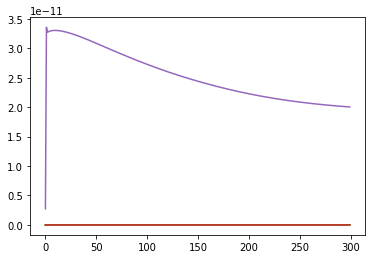

step: 0/10, D_loss: 3.4228876, G_loss_U: 0.04272917, G_loss_S: 0.117364764, E_loss_t0: 3.1694643


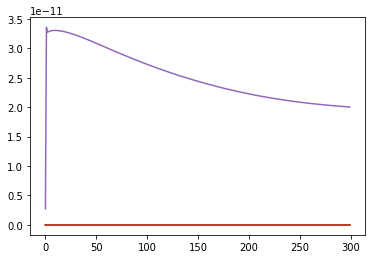

step: 0/10, D_loss: 6.5808315, G_loss_U: 0.048480872, G_loss_S: 0.115170665, E_loss_t0: 3.1428847


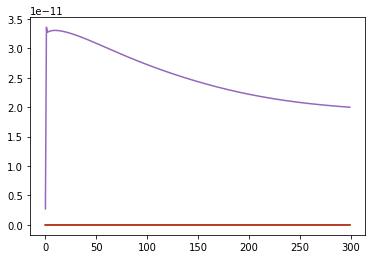

step: 1/10, D_loss: 5.5181055, G_loss_U: 0.08974055, G_loss_S: 0.11082857, E_loss_t0: 3.1657457


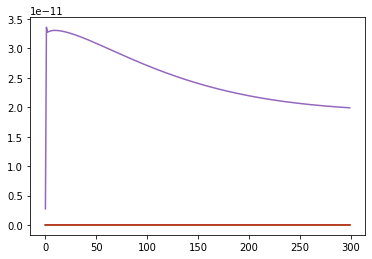

step: 1/10, D_loss: 5.000914, G_loss_U: 0.12613623, G_loss_S: 0.10977957, E_loss_t0: 3.1631634


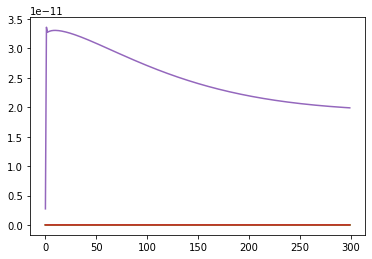

step: 1/10, D_loss: 4.390964, G_loss_U: 0.18201809, G_loss_S: 0.1088014, E_loss_t0: 3.1655276


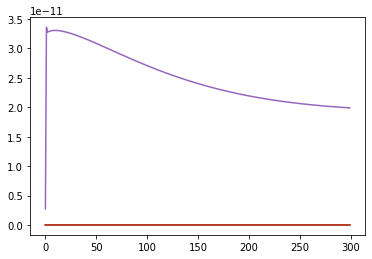

step: 1/10, D_loss: 3.770053, G_loss_U: 0.2639085, G_loss_S: 0.10779362, E_loss_t0: 3.1543427


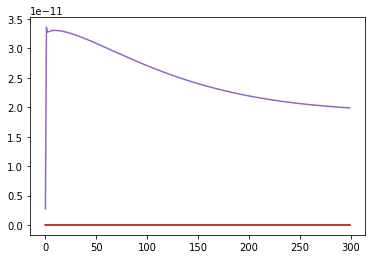

step: 1/10, D_loss: 3.1908317, G_loss_U: 0.3797353, G_loss_S: 0.106766775, E_loss_t0: 3.1617455


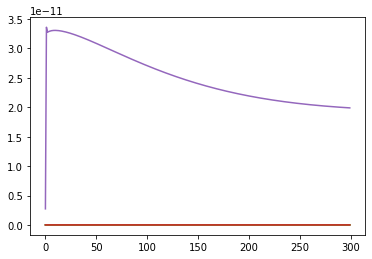

step: 1/10, D_loss: 2.6912155, G_loss_U: 0.53642803, G_loss_S: 0.10568781, E_loss_t0: 3.164197


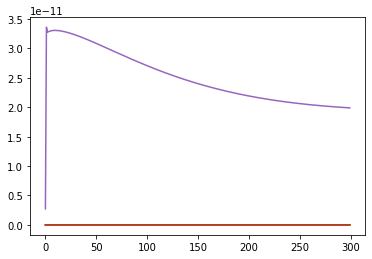

step: 1/10, D_loss: 2.30371, G_loss_U: 0.73169965, G_loss_S: 0.104662694, E_loss_t0: 3.1625957


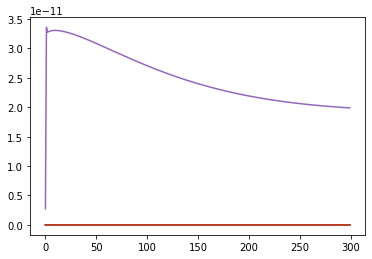

step: 1/10, D_loss: 2.0538416, G_loss_U: 0.94778854, G_loss_S: 0.10367677, E_loss_t0: 3.1446376


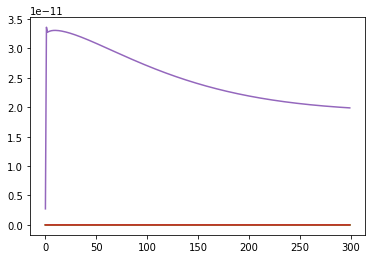

step: 1/10, D_loss: 1.937668, G_loss_U: 1.1574359, G_loss_S: 0.10264342, E_loss_t0: 3.167563


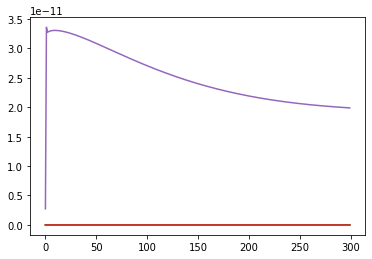

step: 1/10, D_loss: 1.9183775, G_loss_U: 1.3320456, G_loss_S: 0.10168852, E_loss_t0: 3.1575525


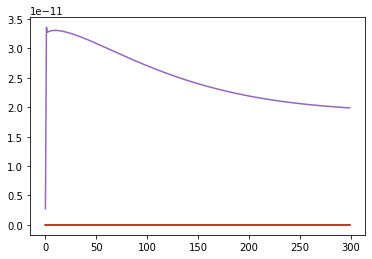

step: 1/10, D_loss: 1.9465599, G_loss_U: 1.4605514, G_loss_S: 0.100710586, E_loss_t0: 3.1672378


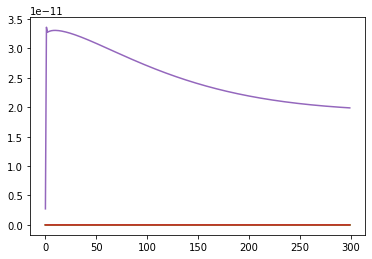

step: 1/10, D_loss: 1.9835114, G_loss_U: 1.5426996, G_loss_S: 0.09975832, E_loss_t0: 3.1685178


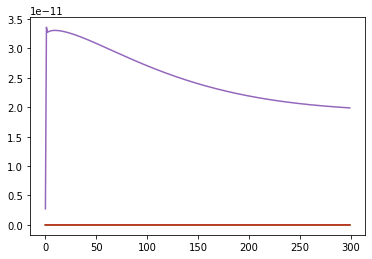

step: 1/10, D_loss: 2.0081632, G_loss_U: 1.568831, G_loss_S: 0.09873422, E_loss_t0: 3.1663792


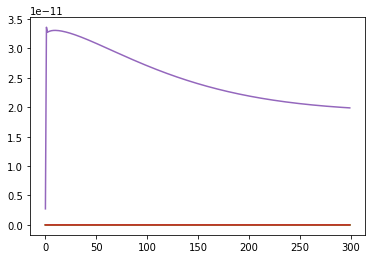

step: 1/10, D_loss: 2.003792, G_loss_U: 1.5211331, G_loss_S: 0.09790622, E_loss_t0: 3.165123


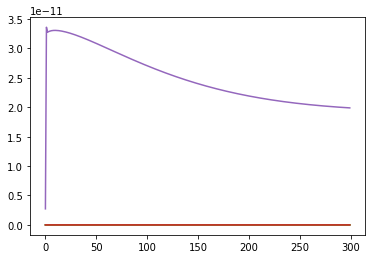

step: 1/10, D_loss: 1.9660242, G_loss_U: 1.427452, G_loss_S: 0.09702747, E_loss_t0: 3.1705375


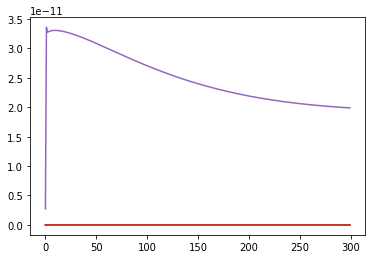

step: 1/10, D_loss: 1.9232788, G_loss_U: 1.3284321, G_loss_S: 0.09615736, E_loss_t0: 3.1647005


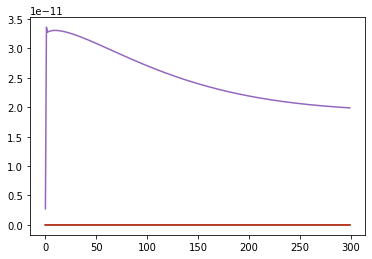

step: 1/10, D_loss: 1.8812667, G_loss_U: 1.2058151, G_loss_S: 0.09532324, E_loss_t0: 3.1542616


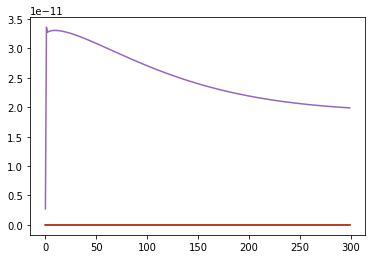

step: 1/10, D_loss: 1.8352906, G_loss_U: 1.0589911, G_loss_S: 0.09449052, E_loss_t0: 3.1606023


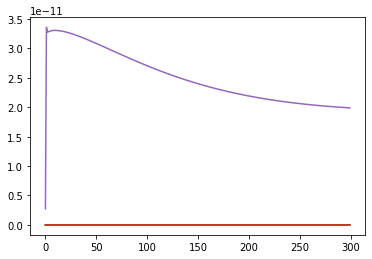

step: 1/10, D_loss: 1.8117396, G_loss_U: 0.95204574, G_loss_S: 0.09372628, E_loss_t0: 3.166354


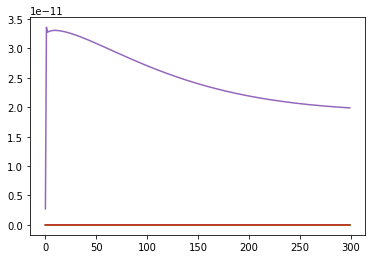

step: 1/10, D_loss: 1.8153522, G_loss_U: 0.913019, G_loss_S: 0.09285032, E_loss_t0: 3.1497002


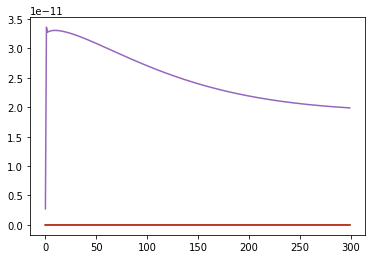

step: 1/10, D_loss: 1.7871234, G_loss_U: 0.9436308, G_loss_S: 0.092098214, E_loss_t0: 3.16965


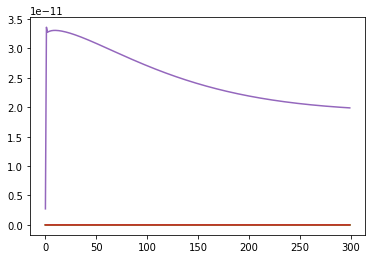

step: 1/10, D_loss: 1.6965437, G_loss_U: 1.0615205, G_loss_S: 0.091368124, E_loss_t0: 3.1522558


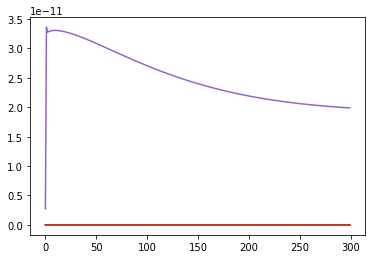

step: 1/10, D_loss: 1.5715365, G_loss_U: 1.1949862, G_loss_S: 0.0906341, E_loss_t0: 3.1636188


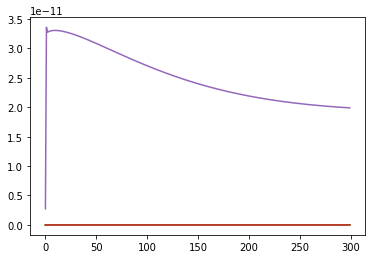

step: 1/10, D_loss: 1.4403378, G_loss_U: 1.2612451, G_loss_S: 0.08993685, E_loss_t0: 3.1753726


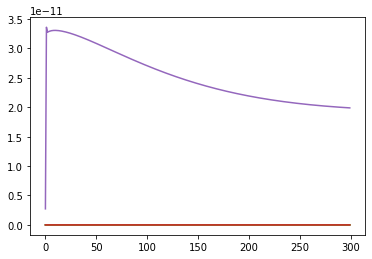

step: 1/10, D_loss: 1.2450911, G_loss_U: 1.2890611, G_loss_S: 0.08929319, E_loss_t0: 3.1553993


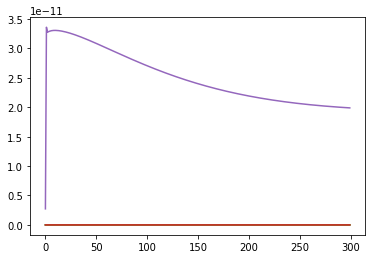

step: 1/10, D_loss: 1.08517, G_loss_U: 1.4197555, G_loss_S: 0.08874005, E_loss_t0: 3.1595006


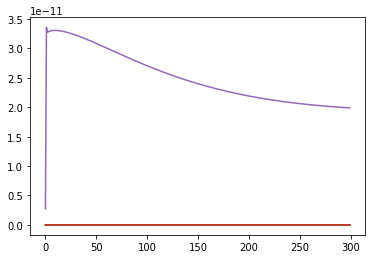

step: 1/10, D_loss: 0.93537474, G_loss_U: 1.603665, G_loss_S: 0.08824826, E_loss_t0: 3.16437


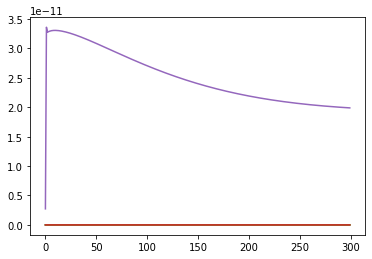

step: 1/10, D_loss: 0.78037316, G_loss_U: 1.7651905, G_loss_S: 0.087694936, E_loss_t0: 3.175605


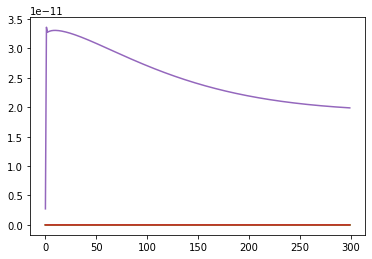

step: 1/10, D_loss: 0.6391322, G_loss_U: 1.9135889, G_loss_S: 0.08712096, E_loss_t0: 3.1636362


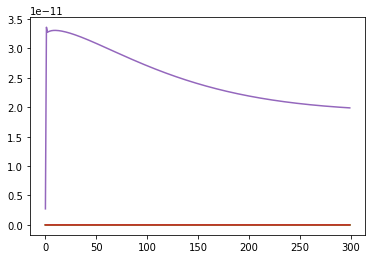

step: 1/10, D_loss: 0.5236949, G_loss_U: 2.0561852, G_loss_S: 0.08652427, E_loss_t0: 3.1591566


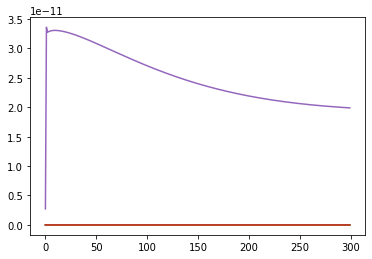

step: 1/10, D_loss: 0.43466237, G_loss_U: 2.1923797, G_loss_S: 0.08570573, E_loss_t0: 3.1598585


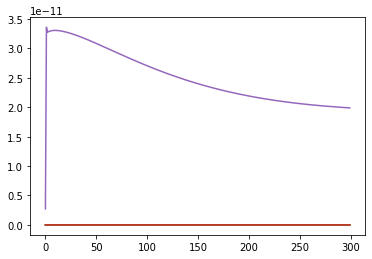

step: 1/10, D_loss: 0.36472136, G_loss_U: 2.3240943, G_loss_S: 0.084489234, E_loss_t0: 3.1675806


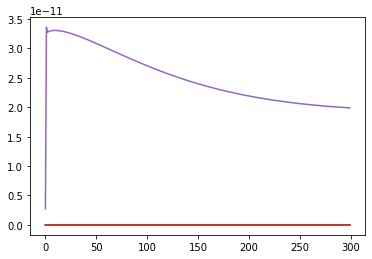

step: 1/10, D_loss: 0.30760133, G_loss_U: 2.4547448, G_loss_S: 0.0831165, E_loss_t0: 3.163541


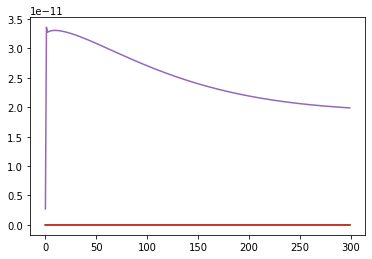

step: 1/10, D_loss: 0.26111248, G_loss_U: 2.5869617, G_loss_S: 0.08180271, E_loss_t0: 3.1583128


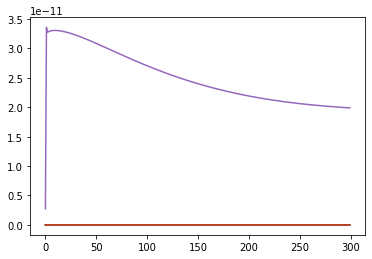

step: 1/10, D_loss: 0.22390318, G_loss_U: 2.7223275, G_loss_S: 0.080796264, E_loss_t0: 3.16633


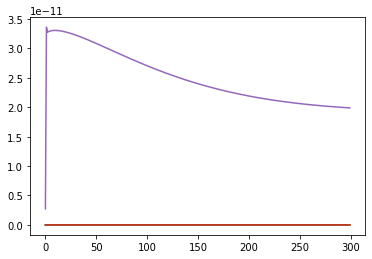

step: 1/10, D_loss: 0.19325346, G_loss_U: 2.8620167, G_loss_S: 0.079986624, E_loss_t0: 3.1676502


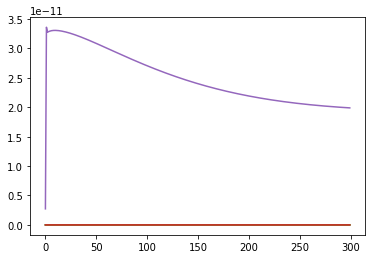

step: 1/10, D_loss: 0.16710234, G_loss_U: 3.0075958, G_loss_S: 0.07929842, E_loss_t0: 3.168515


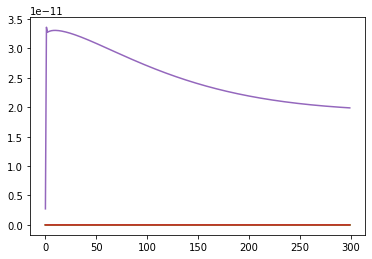

step: 1/10, D_loss: 0.14428565, G_loss_U: 3.007596, G_loss_S: 0.07856638, E_loss_t0: 3.1640627


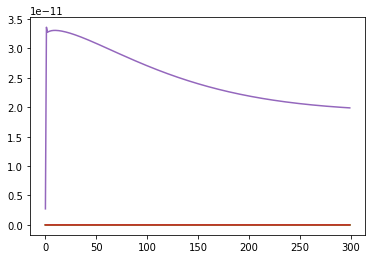

step: 1/10, D_loss: 0.14430997, G_loss_U: 3.007596, G_loss_S: 0.07786419, E_loss_t0: 3.1495998


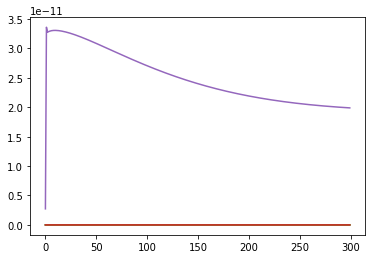

step: 1/10, D_loss: 0.14433186, G_loss_U: 3.007596, G_loss_S: 0.07709519, E_loss_t0: 3.168941


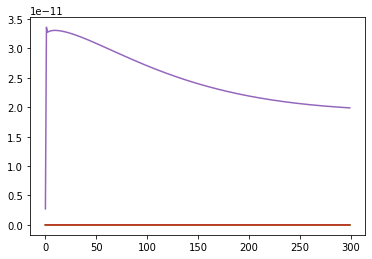

step: 1/10, D_loss: 0.14435743, G_loss_U: 3.007596, G_loss_S: 0.07635803, E_loss_t0: 3.1510155


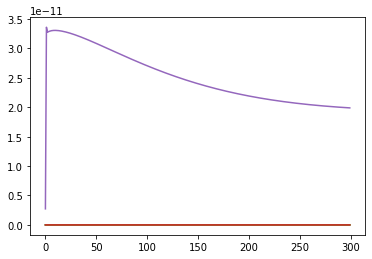

step: 1/10, D_loss: 0.14438283, G_loss_U: 3.007596, G_loss_S: 0.07558994, E_loss_t0: 3.1618748


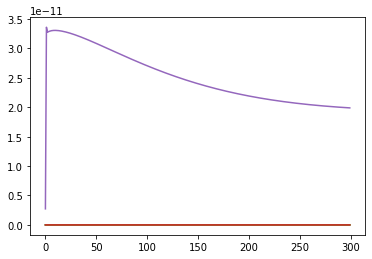

step: 1/10, D_loss: 0.14441323, G_loss_U: 3.007596, G_loss_S: 0.07482787, E_loss_t0: 3.1604114


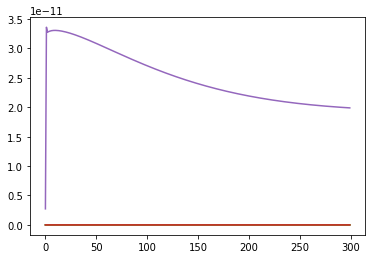

step: 1/10, D_loss: 0.14444736, G_loss_U: 3.007596, G_loss_S: 0.074083984, E_loss_t0: 3.157476


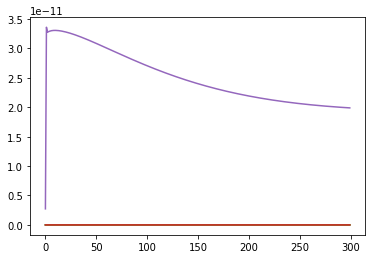

step: 1/10, D_loss: 0.14447856, G_loss_U: 3.007596, G_loss_S: 0.073336005, E_loss_t0: 3.1678355


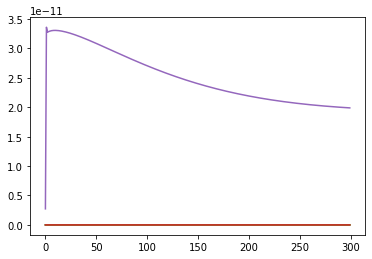

step: 1/10, D_loss: 0.1445156, G_loss_U: 3.007596, G_loss_S: 0.072621934, E_loss_t0: 3.1589396


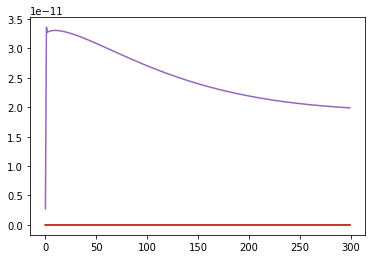

step: 1/10, D_loss: 0.14455223, G_loss_U: 3.007596, G_loss_S: 0.0719162, E_loss_t0: 3.1590393


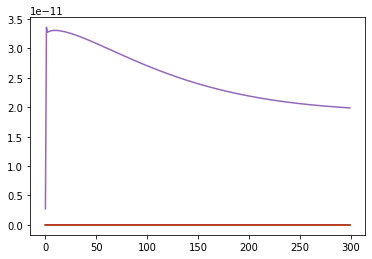

step: 1/10, D_loss: 0.1445887, G_loss_U: 3.007596, G_loss_S: 0.071239375, E_loss_t0: 3.1614366


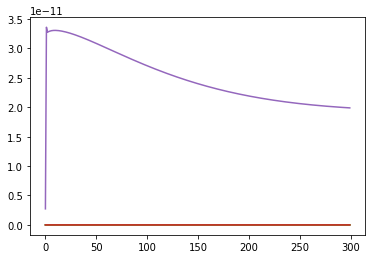

step: 1/10, D_loss: 0.14462993, G_loss_U: 3.007596, G_loss_S: 0.07055283, E_loss_t0: 3.1735537


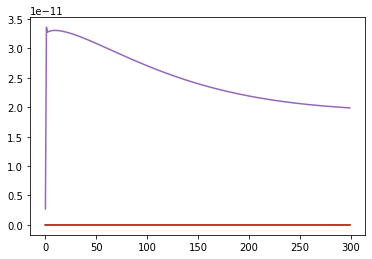

step: 1/10, D_loss: 0.14467397, G_loss_U: 3.007596, G_loss_S: 0.06990492, E_loss_t0: 3.1487877


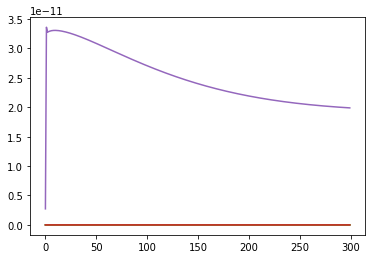

step: 1/10, D_loss: 0.14471439, G_loss_U: 3.007596, G_loss_S: 0.06928371, E_loss_t0: 3.1696067


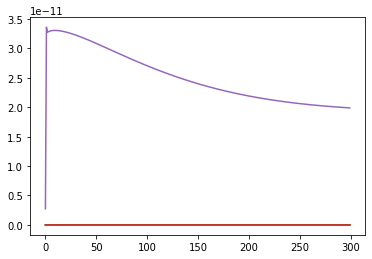

step: 1/10, D_loss: 0.14475688, G_loss_U: 3.007596, G_loss_S: 0.06865294, E_loss_t0: 3.1672974


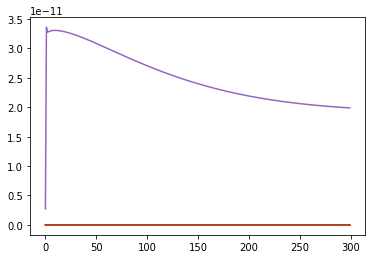

step: 1/10, D_loss: 0.14480364, G_loss_U: 3.007596, G_loss_S: 0.06804084, E_loss_t0: 3.1558588


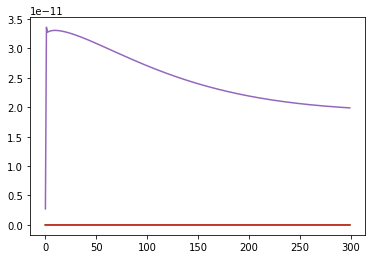

step: 1/10, D_loss: 0.14485002, G_loss_U: 3.007596, G_loss_S: 0.06743754, E_loss_t0: 3.1614177


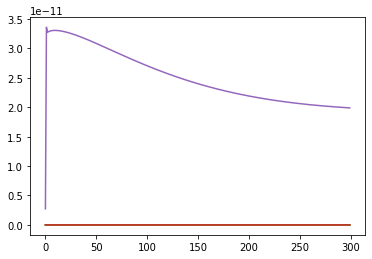

step: 1/10, D_loss: 0.14490141, G_loss_U: 3.007596, G_loss_S: 0.06684492, E_loss_t0: 3.1676369


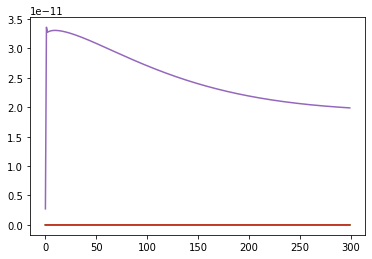

step: 1/10, D_loss: 0.14495641, G_loss_U: 3.007596, G_loss_S: 0.06623018, E_loss_t0: 3.160896


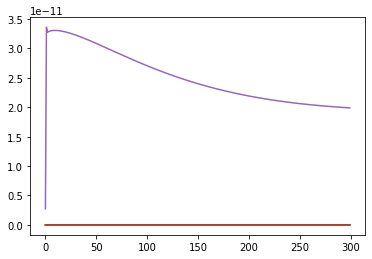

step: 1/10, D_loss: 0.14501153, G_loss_U: 3.007596, G_loss_S: 0.065603845, E_loss_t0: 3.1634982


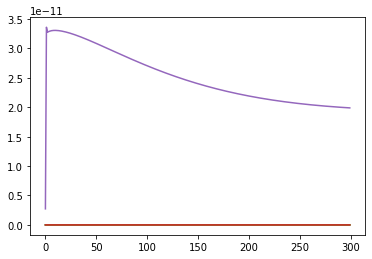

step: 1/10, D_loss: 0.14507395, G_loss_U: 3.007596, G_loss_S: 0.06495059, E_loss_t0: 3.1587052


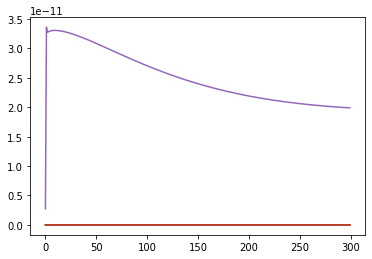

step: 1/10, D_loss: 0.1451385, G_loss_U: 3.007596, G_loss_S: 0.064221516, E_loss_t0: 3.1598926


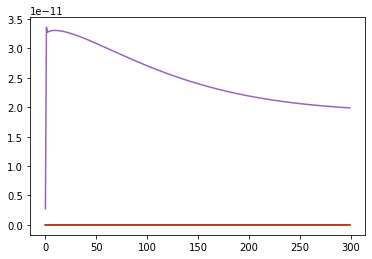

step: 1/10, D_loss: 0.14522038, G_loss_U: 3.007596, G_loss_S: 0.06344188, E_loss_t0: 3.163651


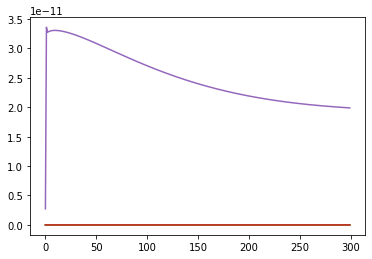

step: 1/10, D_loss: 0.14532007, G_loss_U: 3.007596, G_loss_S: 0.06260358, E_loss_t0: 3.1717136


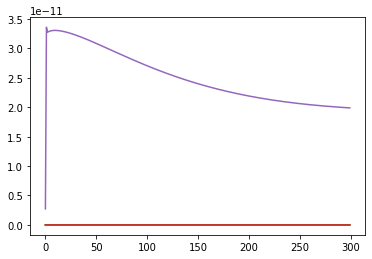

step: 1/10, D_loss: 0.14544362, G_loss_U: 3.007596, G_loss_S: 0.061763495, E_loss_t0: 3.1601322


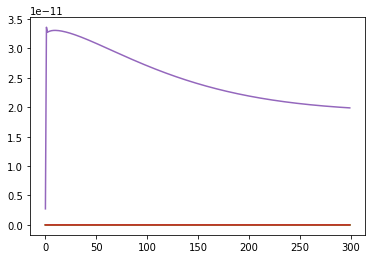

step: 1/10, D_loss: 0.1455977, G_loss_U: 3.007596, G_loss_S: 0.060991727, E_loss_t0: 3.1749582


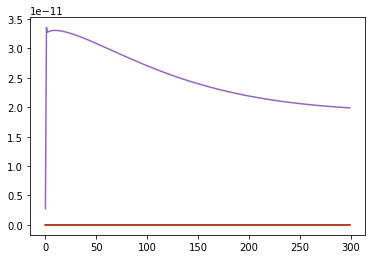

step: 1/10, D_loss: 0.14576104, G_loss_U: 3.007596, G_loss_S: 0.06034247, E_loss_t0: 3.1615562


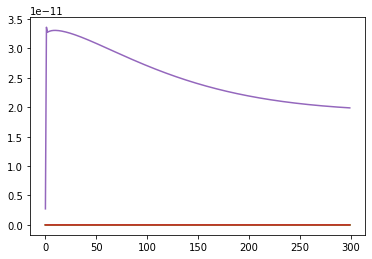

step: 1/10, D_loss: 0.14593364, G_loss_U: 3.007596, G_loss_S: 0.05982923, E_loss_t0: 3.1727412


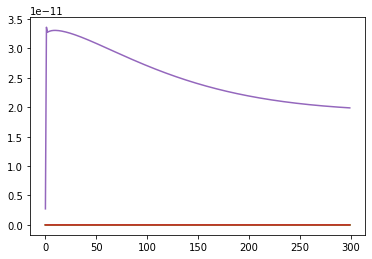

step: 1/10, D_loss: 0.14609943, G_loss_U: 3.007596, G_loss_S: 0.059392743, E_loss_t0: 3.1624022


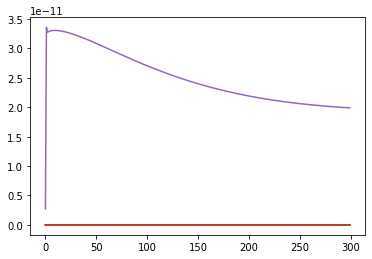

step: 1/10, D_loss: 0.14624228, G_loss_U: 3.007596, G_loss_S: 0.05890619, E_loss_t0: 3.1604528


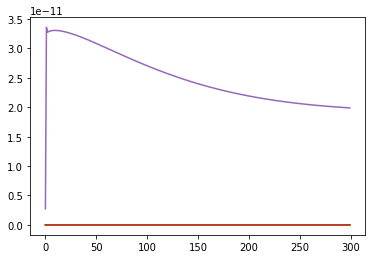

step: 1/10, D_loss: 0.14637168, G_loss_U: 3.007596, G_loss_S: 0.05839906, E_loss_t0: 3.1649253


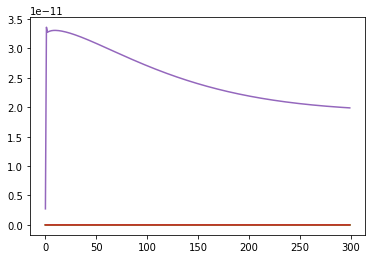

step: 1/10, D_loss: 0.14648767, G_loss_U: 3.007596, G_loss_S: 0.057872258, E_loss_t0: 3.1544533


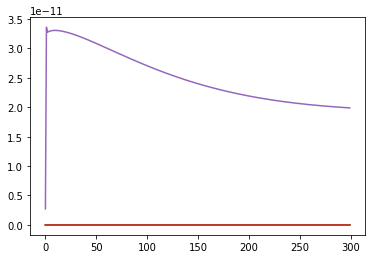

step: 1/10, D_loss: 0.14657909, G_loss_U: 3.007596, G_loss_S: 0.05737157, E_loss_t0: 3.1590517


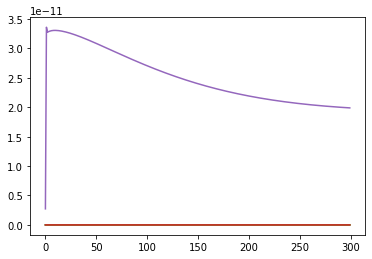

step: 1/10, D_loss: 0.14667441, G_loss_U: 3.0075958, G_loss_S: 0.0568509, E_loss_t0: 3.1703198


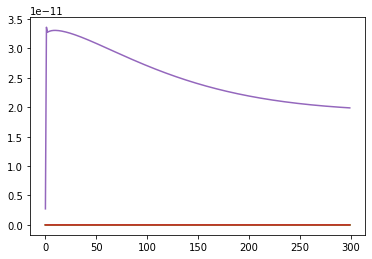

step: 1/10, D_loss: 0.14675073, G_loss_U: 3.0075958, G_loss_S: 0.056332044, E_loss_t0: 3.163489


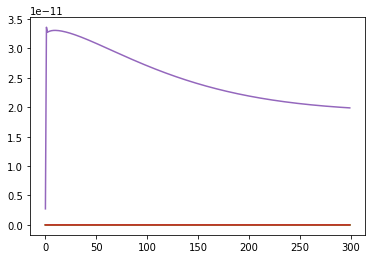

step: 1/10, D_loss: 0.14682443, G_loss_U: 3.0075958, G_loss_S: 0.055840112, E_loss_t0: 3.152192


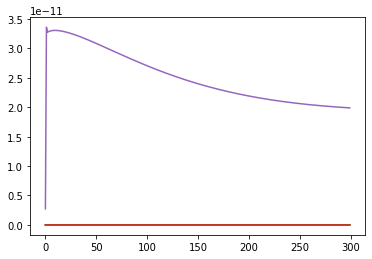

step: 1/10, D_loss: 0.14689101, G_loss_U: 3.0075958, G_loss_S: 0.055327184, E_loss_t0: 3.1628323


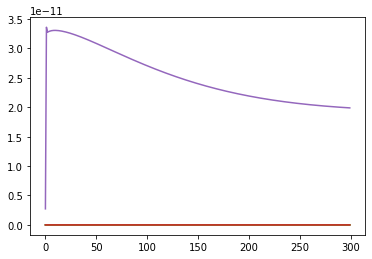

step: 1/10, D_loss: 0.14694016, G_loss_U: 3.0075958, G_loss_S: 0.054838054, E_loss_t0: 3.170019


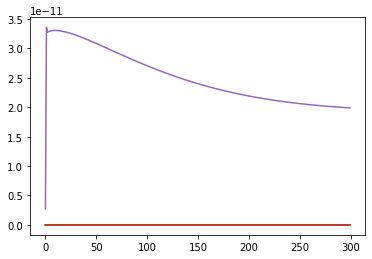

step: 1/10, D_loss: 0.14700116, G_loss_U: 3.0075958, G_loss_S: 0.054372136, E_loss_t0: 3.1528616


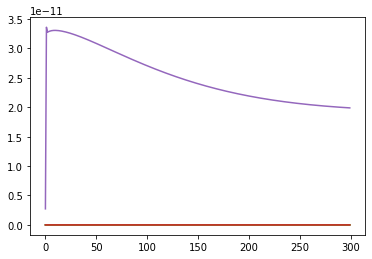

step: 1/10, D_loss: 0.14705205, G_loss_U: 3.0075958, G_loss_S: 0.053914987, E_loss_t0: 3.1607893


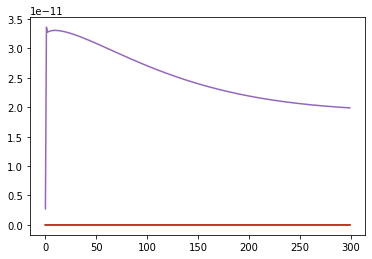

step: 1/10, D_loss: 0.14710173, G_loss_U: 3.0075958, G_loss_S: 0.05347951, E_loss_t0: 3.1564639


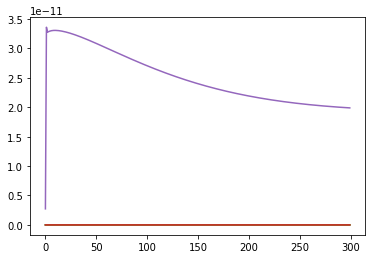

step: 1/10, D_loss: 0.14715803, G_loss_U: 3.0075958, G_loss_S: 0.05306728, E_loss_t0: 3.162192


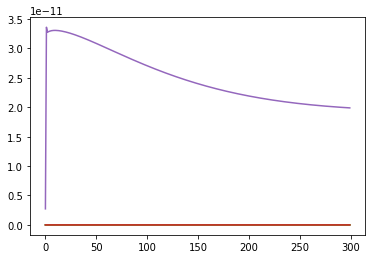

step: 1/10, D_loss: 0.14721012, G_loss_U: 3.0075958, G_loss_S: 0.0526456, E_loss_t0: 3.1549528


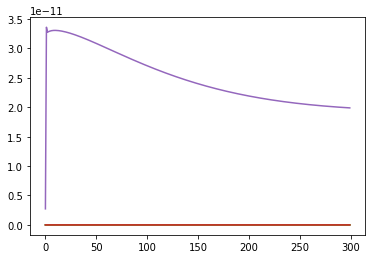

step: 1/10, D_loss: 0.14725843, G_loss_U: 3.0075958, G_loss_S: 0.05224842, E_loss_t0: 3.174894


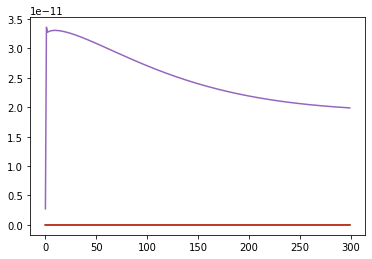

step: 1/10, D_loss: 0.1473125, G_loss_U: 3.0075958, G_loss_S: 0.051862314, E_loss_t0: 3.1642888


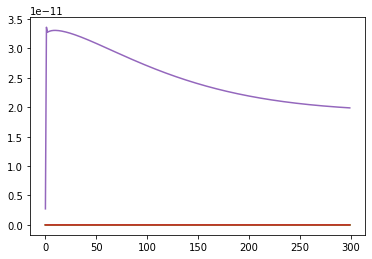

step: 1/10, D_loss: 0.14737093, G_loss_U: 3.0075958, G_loss_S: 0.051484693, E_loss_t0: 3.1553693


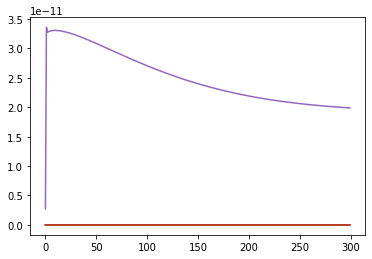

step: 1/10, D_loss: 0.1474425, G_loss_U: 3.0075958, G_loss_S: 0.051094033, E_loss_t0: 3.1547654


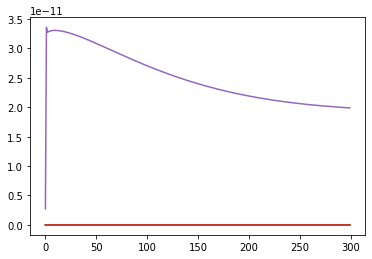

step: 1/10, D_loss: 0.14750874, G_loss_U: 3.0075958, G_loss_S: 0.05072582, E_loss_t0: 3.1600828


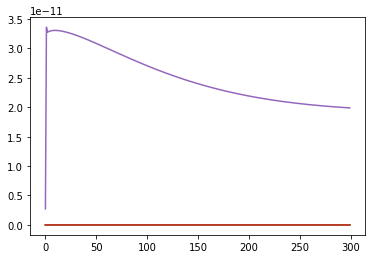

step: 1/10, D_loss: 0.147587, G_loss_U: 3.0075958, G_loss_S: 0.050351553, E_loss_t0: 3.1712232


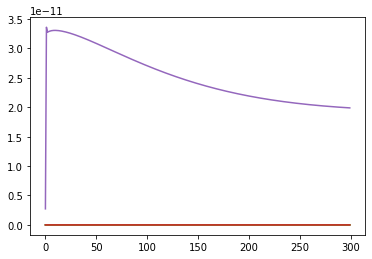

step: 1/10, D_loss: 0.14768174, G_loss_U: 3.0075958, G_loss_S: 0.049965627, E_loss_t0: 3.155698


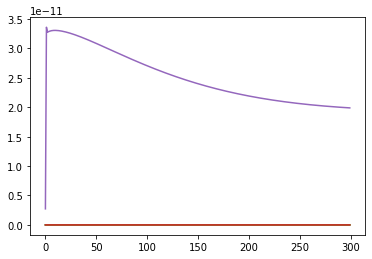

step: 1/10, D_loss: 0.14779358, G_loss_U: 3.0075958, G_loss_S: 0.049583733, E_loss_t0: 3.1635027


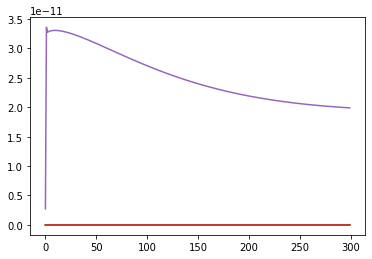

step: 1/10, D_loss: 0.14791164, G_loss_U: 3.0075958, G_loss_S: 0.049206674, E_loss_t0: 3.1506956


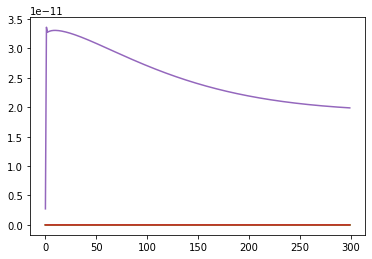

step: 1/10, D_loss: 0.14805092, G_loss_U: 3.0075958, G_loss_S: 0.04882916, E_loss_t0: 3.1702156


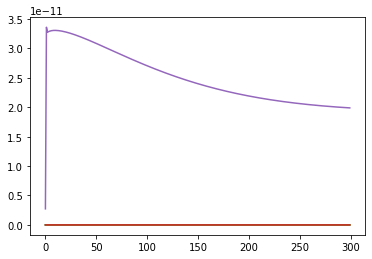

step: 1/10, D_loss: 0.14822738, G_loss_U: 3.0075958, G_loss_S: 0.04842918, E_loss_t0: 3.1607835


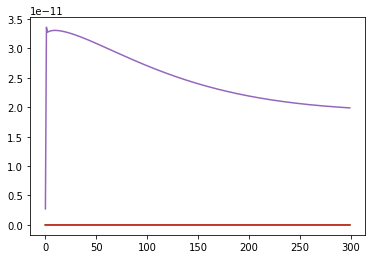

step: 1/10, D_loss: 0.14840989, G_loss_U: 3.0075958, G_loss_S: 0.048047997, E_loss_t0: 3.157148


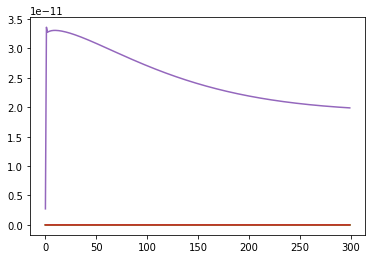

step: 1/10, D_loss: 0.14863923, G_loss_U: 3.0075958, G_loss_S: 0.047652535, E_loss_t0: 3.1669421


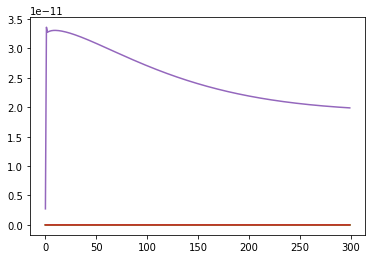

step: 1/10, D_loss: 0.14887805, G_loss_U: 3.0075958, G_loss_S: 0.047282282, E_loss_t0: 3.167863


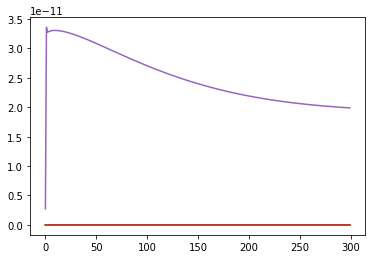

step: 1/10, D_loss: 0.1491297, G_loss_U: 3.0075958, G_loss_S: 0.046903905, E_loss_t0: 3.154696


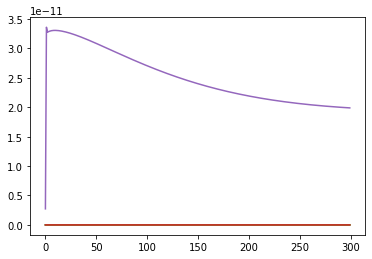

step: 1/10, D_loss: 0.14941007, G_loss_U: 3.0075958, G_loss_S: 0.04652527, E_loss_t0: 3.1646945


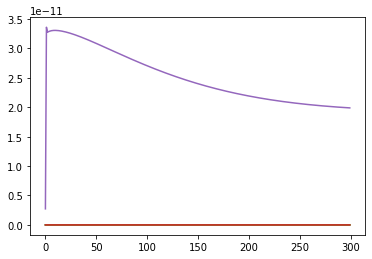

step: 1/10, D_loss: 0.14966753, G_loss_U: 3.0075958, G_loss_S: 0.04616188, E_loss_t0: 3.162837


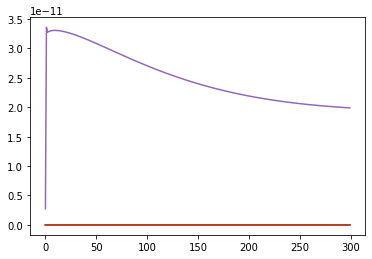

step: 1/10, D_loss: 0.15001225, G_loss_U: 3.1606398, G_loss_S: 0.045748327, E_loss_t0: 3.1668088


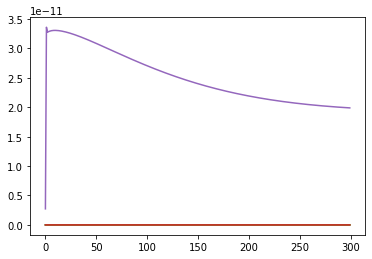

step: 1/10, D_loss: 0.12811717, G_loss_U: 3.1606398, G_loss_S: 0.04539567, E_loss_t0: 3.1694643


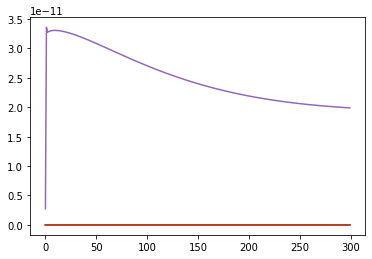

step: 1/10, D_loss: 0.12817155, G_loss_U: 3.1606398, G_loss_S: 0.04497414, E_loss_t0: 3.1428847


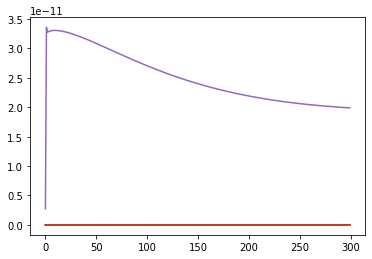

step: 2/10, D_loss: 0.12569861, G_loss_U: 3.0452213, G_loss_S: 0.043805514, E_loss_t0: 3.1657457


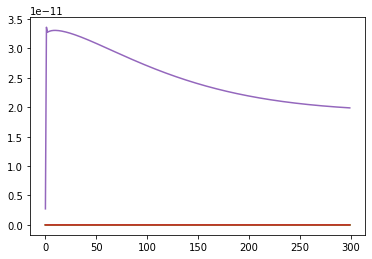

step: 2/10, D_loss: 0.1258339, G_loss_U: 3.0452213, G_loss_S: 0.043449324, E_loss_t0: 3.1631634


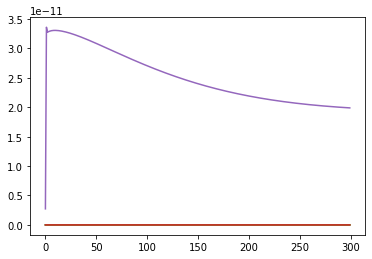

step: 2/10, D_loss: 0.1260972, G_loss_U: 3.0452213, G_loss_S: 0.043086685, E_loss_t0: 3.1655276


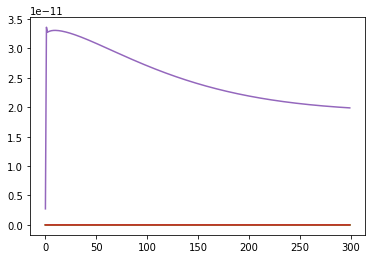

step: 2/10, D_loss: 0.12635736, G_loss_U: 3.0452213, G_loss_S: 0.04267788, E_loss_t0: 3.1543427


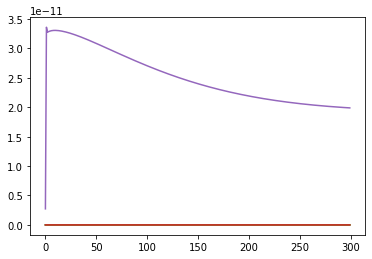

step: 2/10, D_loss: 0.12666576, G_loss_U: 3.0452213, G_loss_S: 0.04221309, E_loss_t0: 3.1617455


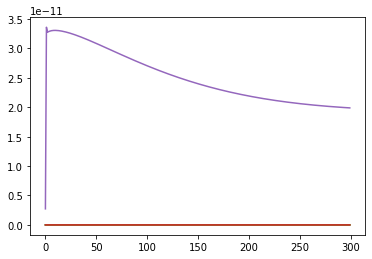

step: 2/10, D_loss: 0.1268892, G_loss_U: 3.0452213, G_loss_S: 0.04181642, E_loss_t0: 3.164197


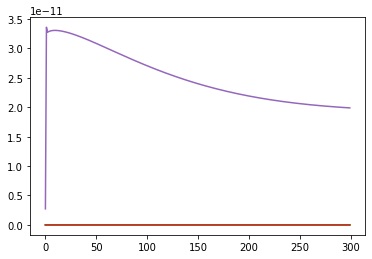

step: 2/10, D_loss: 0.1270191, G_loss_U: 3.0452213, G_loss_S: 0.041363258, E_loss_t0: 3.1625957


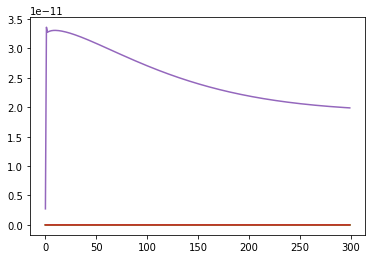

step: 2/10, D_loss: 0.12710735, G_loss_U: 3.0452213, G_loss_S: 0.040858023, E_loss_t0: 3.1446376


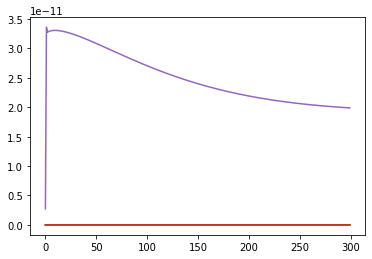

step: 2/10, D_loss: 0.12716693, G_loss_U: 3.0452213, G_loss_S: 0.04033664, E_loss_t0: 3.167563


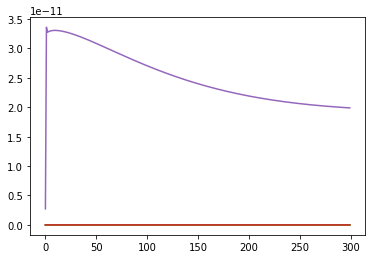

step: 2/10, D_loss: 0.1272021, G_loss_U: 3.0452213, G_loss_S: 0.039799713, E_loss_t0: 3.1575525


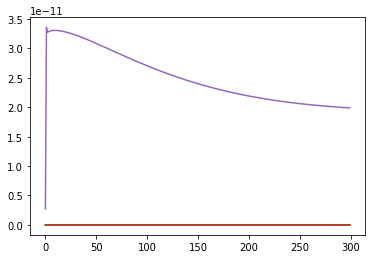

step: 2/10, D_loss: 0.12722167, G_loss_U: 3.0452213, G_loss_S: 0.039264843, E_loss_t0: 3.1672378


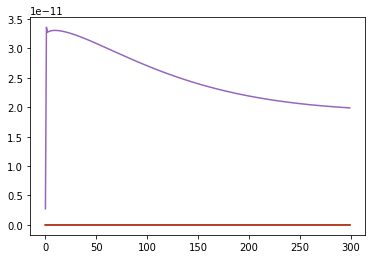

step: 2/10, D_loss: 0.12722224, G_loss_U: 3.0452213, G_loss_S: 0.038726665, E_loss_t0: 3.1685178


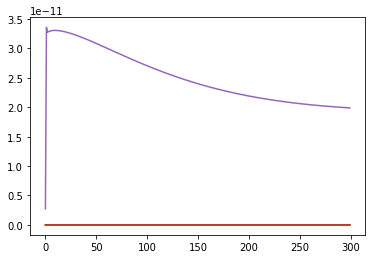

step: 2/10, D_loss: 0.12720773, G_loss_U: 3.0452213, G_loss_S: 0.03820394, E_loss_t0: 3.1663792


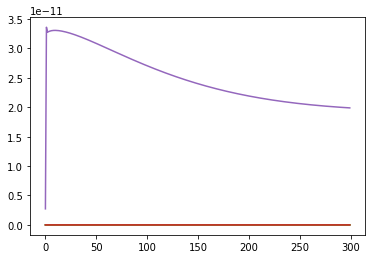

step: 2/10, D_loss: 0.12720096, G_loss_U: 3.0452213, G_loss_S: 0.03768405, E_loss_t0: 3.165123


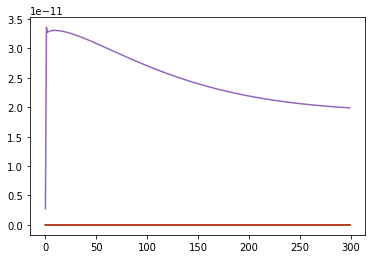

step: 2/10, D_loss: 0.12719642, G_loss_U: 3.0452213, G_loss_S: 0.037174966, E_loss_t0: 3.1705375


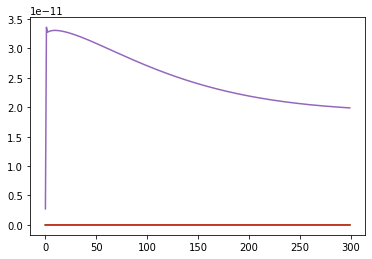

step: 2/10, D_loss: 0.12718737, G_loss_U: 3.0452213, G_loss_S: 0.036674116, E_loss_t0: 3.1647005


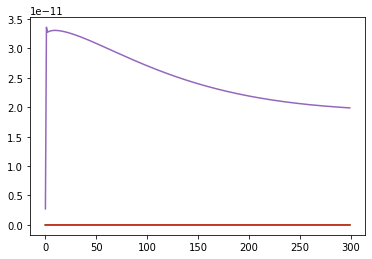

step: 2/10, D_loss: 0.12718539, G_loss_U: 3.0452213, G_loss_S: 0.03617704, E_loss_t0: 3.1542616


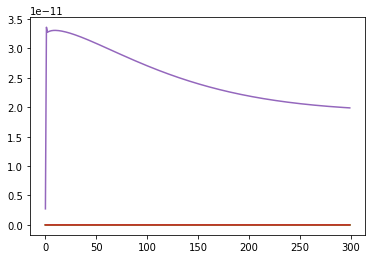

step: 2/10, D_loss: 0.1271806, G_loss_U: 3.0452213, G_loss_S: 0.035675615, E_loss_t0: 3.1606023


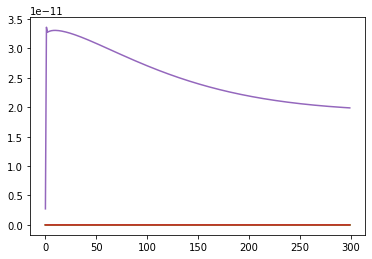

step: 2/10, D_loss: 0.12719318, G_loss_U: 3.0452213, G_loss_S: 0.035188105, E_loss_t0: 3.166354


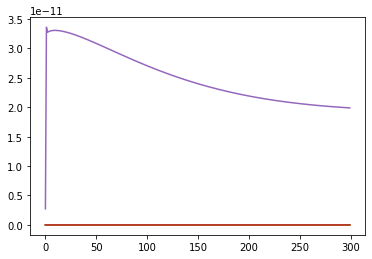

step: 2/10, D_loss: 0.12719883, G_loss_U: 3.0452213, G_loss_S: 0.034711786, E_loss_t0: 3.1497002


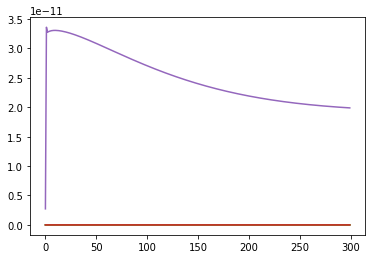

step: 2/10, D_loss: 0.12722808, G_loss_U: 3.0452213, G_loss_S: 0.034224417, E_loss_t0: 3.16965


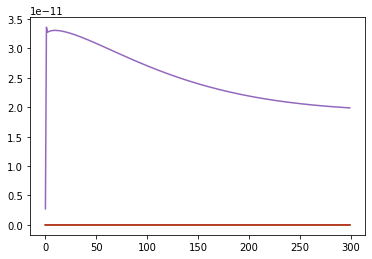

step: 2/10, D_loss: 0.12726286, G_loss_U: 3.0452213, G_loss_S: 0.03374574, E_loss_t0: 3.1522558


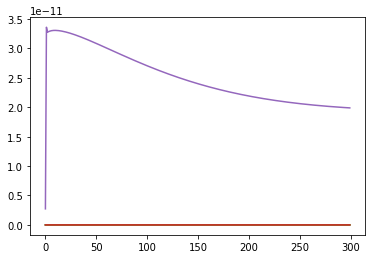

step: 2/10, D_loss: 0.12730542, G_loss_U: 3.0452213, G_loss_S: 0.033250626, E_loss_t0: 3.1636188


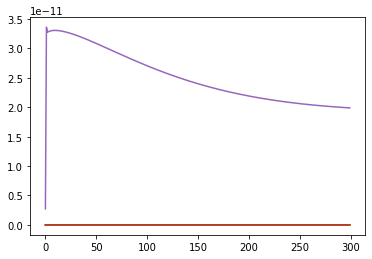

step: 2/10, D_loss: 0.12736586, G_loss_U: 3.0452213, G_loss_S: 0.032765076, E_loss_t0: 3.1753726


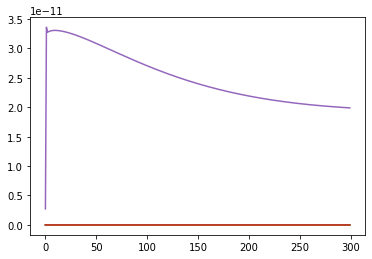

step: 2/10, D_loss: 0.12743631, G_loss_U: 3.0452213, G_loss_S: 0.03226569, E_loss_t0: 3.1553993


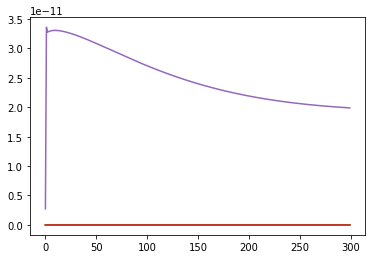

step: 2/10, D_loss: 0.12751544, G_loss_U: 3.0452213, G_loss_S: 0.031775467, E_loss_t0: 3.1595006


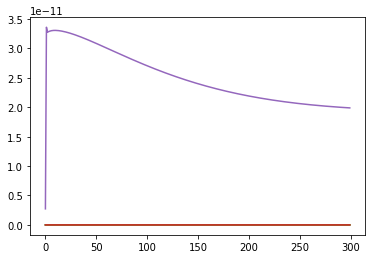

step: 2/10, D_loss: 0.12761518, G_loss_U: 3.0452213, G_loss_S: 0.03127866, E_loss_t0: 3.16437


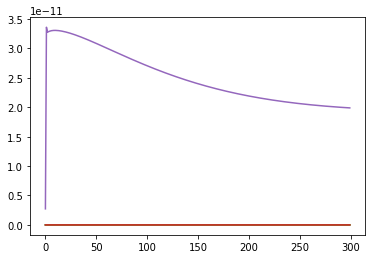

step: 2/10, D_loss: 0.1277208, G_loss_U: 3.0452213, G_loss_S: 0.030790629, E_loss_t0: 3.175605


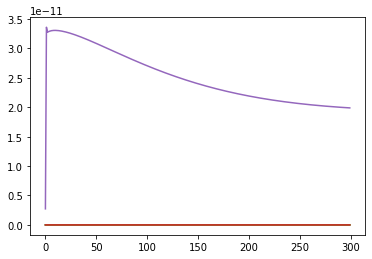

step: 2/10, D_loss: 0.1278539, G_loss_U: 3.0452213, G_loss_S: 0.030290432, E_loss_t0: 3.1636362


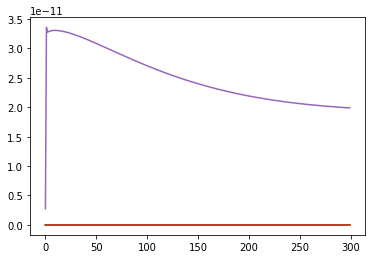

step: 2/10, D_loss: 0.12798834, G_loss_U: 3.0452213, G_loss_S: 0.029784532, E_loss_t0: 3.1591566


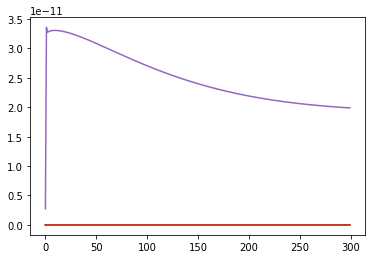

step: 2/10, D_loss: 0.1281694, G_loss_U: 3.0452213, G_loss_S: 0.029273001, E_loss_t0: 3.1598585


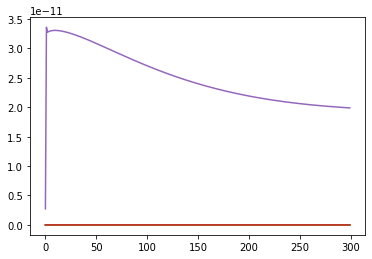

step: 2/10, D_loss: 0.12835476, G_loss_U: 3.0452213, G_loss_S: 0.028773133, E_loss_t0: 3.1675806


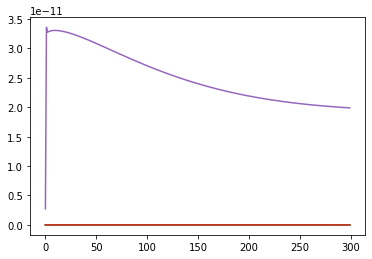

step: 2/10, D_loss: 0.1285761, G_loss_U: 3.0452213, G_loss_S: 0.028253201, E_loss_t0: 3.163541


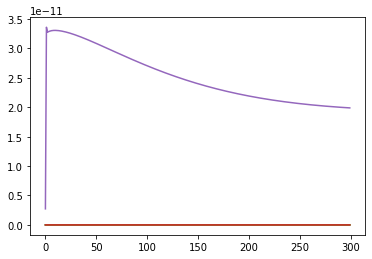

step: 2/10, D_loss: 0.12882817, G_loss_U: 3.0452213, G_loss_S: 0.027743723, E_loss_t0: 3.1583128


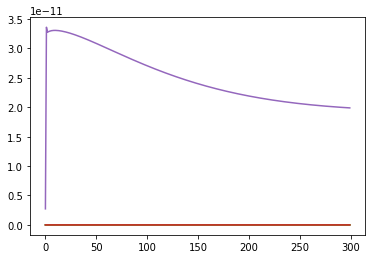

step: 2/10, D_loss: 0.12911293, G_loss_U: 3.0452213, G_loss_S: 0.027248599, E_loss_t0: 3.16633


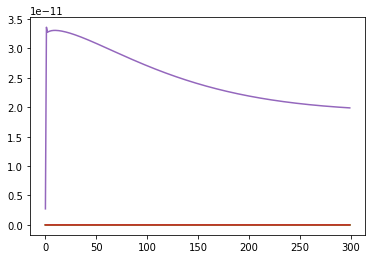

step: 2/10, D_loss: 0.12942189, G_loss_U: 3.0452213, G_loss_S: 0.026752641, E_loss_t0: 3.1676502


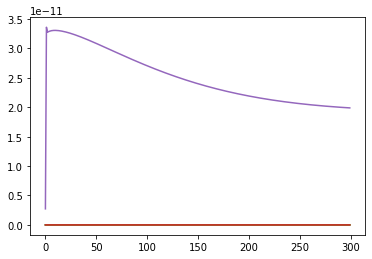

step: 2/10, D_loss: 0.12978044, G_loss_U: 3.0452213, G_loss_S: 0.026293214, E_loss_t0: 3.168515


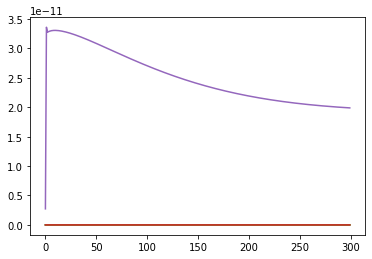

step: 2/10, D_loss: 0.13017094, G_loss_U: 3.045221, G_loss_S: 0.02582513, E_loss_t0: 3.1640627


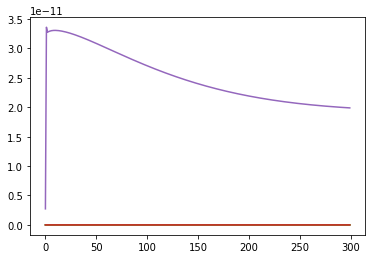

step: 2/10, D_loss: 0.130589, G_loss_U: 3.045221, G_loss_S: 0.025392586, E_loss_t0: 3.1495998


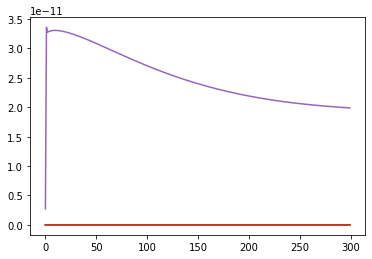

step: 2/10, D_loss: 0.13101602, G_loss_U: 3.045221, G_loss_S: 0.02497961, E_loss_t0: 3.168941


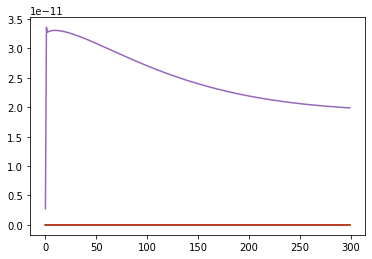

step: 2/10, D_loss: 0.13150075, G_loss_U: 3.045221, G_loss_S: 0.024612354, E_loss_t0: 3.1510155


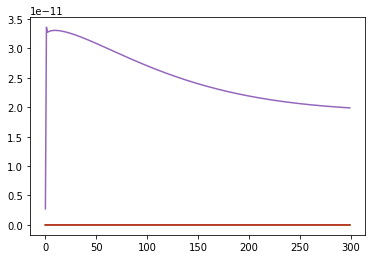

step: 2/10, D_loss: 0.13202061, G_loss_U: 3.045221, G_loss_S: 0.024231706, E_loss_t0: 3.1618748


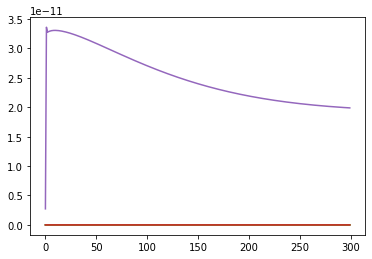

step: 2/10, D_loss: 0.1325809, G_loss_U: 3.045221, G_loss_S: 0.023878241, E_loss_t0: 3.1604114


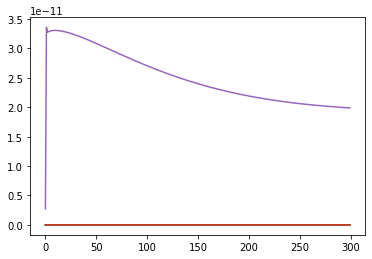

step: 2/10, D_loss: 0.13319732, G_loss_U: 3.045221, G_loss_S: 0.023550443, E_loss_t0: 3.157476


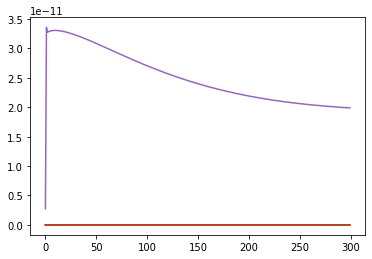

step: 2/10, D_loss: 0.1338467, G_loss_U: 3.045221, G_loss_S: 0.02323648, E_loss_t0: 3.1678355


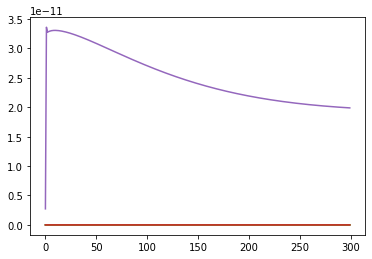

step: 2/10, D_loss: 0.1345596, G_loss_U: 3.045221, G_loss_S: 0.02294479, E_loss_t0: 3.1589396


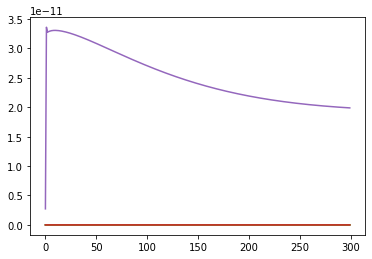

step: 2/10, D_loss: 0.13535374, G_loss_U: 3.045221, G_loss_S: 0.022653649, E_loss_t0: 3.1590393


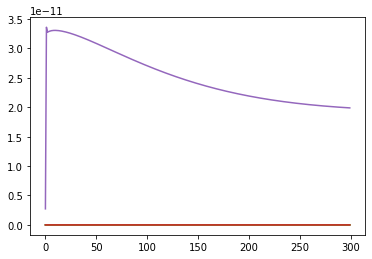

step: 2/10, D_loss: 0.13617274, G_loss_U: 3.045221, G_loss_S: 0.02237682, E_loss_t0: 3.1614366


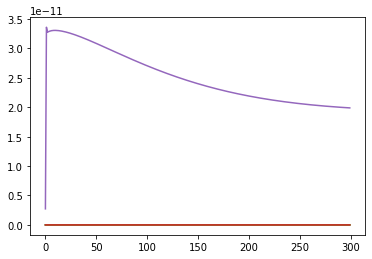

step: 2/10, D_loss: 0.13714127, G_loss_U: 3.045221, G_loss_S: 0.022090187, E_loss_t0: 3.1735537


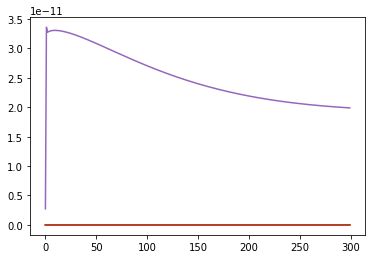

KeyboardInterrupt: 

In [9]:
Generator, Embedder, Supervisor, Recovery, Discriminator, checkpoints = TimeGAN(data, parameters)

A Data Set of the same size and dimensions of the original synthetic data Set is generated and visualized and both are compared

In [ ]:
data.shape

In [ ]:
cuda = torch.cuda.is_available()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

#random_test = random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])
test_sample = Generator.to(device)(torch.tensor(random_generator(200, dim, extract_time(data)[0], extract_time(data)[1])).type(Tensor).to(device))[0]
test_sample = torch.reshape(test_sample, (200, seq_len, parameters['hidden_dim']))
test_recovery = Recovery(test_sample)
test_recovery = torch.reshape(test_recovery[0], (200, seq_len, dim))
visualization(data[:200,:,:], test_recovery.cpu().detach().numpy(), 'tsne')
visualization(data[:200,:,:], test_recovery.cpu().detach().numpy(), 'pca')
  

In [ ]:
test_recovery.shape

In [ ]:
plt.plot(test_recovery.cpu().detach().numpy()[0,:,0])

In [ ]:
test_recovery.cpu().detach().numpy()